In [147]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

font_dirs = ['./font'] # 폰트경로
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
%config InlineBackend.figure_format = 'retina'

In [2]:
from glob import glob
data_path = glob('./data/*.csv')

In [3]:
data_path

['./data/2014_공공시설운영 현황.csv',
 './data/2017_공공시설운영 현황.csv',
 './data/2019_공공시설운영 현황.csv',
 './data/2018_공공시설운영 현황.csv',
 './data/2016_공공시설운영 현황.csv',
 './data/2015_공공시설운영 현황.csv']

In [148]:
with open('./data/2019_공공시설운영 현황.csv','r',encoding='CP949') as f:
    data = f.readlines()


In [149]:
len(data)

865

In [150]:
columns=[i.strip() for i in data[0].split(';')]

In [151]:
df = pd.DataFrame([],columns=columns)

In [152]:
df

,순번,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,비용,수익,순수익


In [153]:
len([i.strip() for i in data[3].split(';')])

20

In [154]:
new_columns = df.columns.tolist() 
new_columns = new_columns[:12] + [i.strip() for i in data[1].split(';')] + new_columns[17:]
df.columns = new_columns

In [155]:
for j in range(2,len(data)):
    df.loc[len(df)] = [i.strip() for i in data[j].split(';')]
df = df.set_index('순번', drop=True)

In [156]:
df

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익
순번,,,,,,,,,,,,,,,,,,,
1,서울본청,문화시설,박물관,서울도시건축전시관,2019.01.11,위탁,"2,988","1,558",0,"290,895","28,168","21,047",526,526,"20,521",40,"2,232",60,"-2,172"
2,서울본청,문화시설,박물관,서울역사박물관,1998.02.03,직영,"20,883","99,728",259,"1,669,855","34,411","34,411",341,"14,270","20,140",80,"14,434",818,"-13,617"
3,서울본청,문화시설,박물관,한성백제박물관,2011.12.31,직영,"19,423","14,894",140,"788,020","79,530","79,530","2,485","15,906","63,624",40,"13,101",242,"-12,858"
4,서울본청,문화시설,문화예술회관,동대문디자인플라자,2013.11.20,위탁,"86,574","62,108",40,"11,739,138","421,222","384,332","10,128","39,991","344,341",40,"14,692","15,477",784
5,서울본청,문화시설,과학관,서울시립과학관,2016.06.30,직영,"12,330","25,875",84,"216,986","42,349","42,349","2,231","7,354","34,995",40,"4,807",308,"-4,499"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,제주본청,체육시설,축구장,제주종합경기장 주경기장,1968.07.30,직영,"11,399","30,327",1,"147,498","31,491","31,491","1,903","23,087","8,403",40,853,28,-824
860,제주본청,체육시설,수영장,서귀포국민체육센터,2005.12.28,위탁,"7,837","7,927",17,"246,013","12,154","12,154",191,"3,374","8,781",60,"1,182",354,-828
861,제주본청,체육시설,기타체육시설,공천포전지훈련센터,2010.04.23,직영,"5,822","148,462",3,"50,416","26,800","26,800",940,"8,401","16,875",40,131,22,-110


In [158]:
df = df.astype({i: 'str' for i in df.columns[6:]})

In [159]:
def replace_comma(d):
    return str(d).replace(',','')


In [160]:
df=df.applymap(replace_comma)
df = df.astype({i: 'int' for i in df.columns[6:]})
df = df.astype({'건립일': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 1 to 863
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치단체      863 non-null    object
 1   시설유형      863 non-null    object
 2   시설구분      863 non-null    object
 3   시설명       863 non-null    object
 4   건립일       863 non-null    string
 5   운영방식      863 non-null    object
 6   건물면적(㎡)   863 non-null    int64 
 7   토지면적(㎡)   863 non-null    int64 
 8   관리인력      863 non-null    int64 
 9   연간이용인원    863 non-null    int64 
 10  건립비용      863 non-null    int64 
 11  취득가액      863 non-null    int64 
 12  감가상각액     863 non-null    int64 
 13  감가상각 누계액  863 non-null    int64 
 14  장부가액      863 non-null    int64 
 15  내용연수      863 non-null    int64 
 16  비용        863 non-null    int64 
 17  수익        863 non-null    int64 
 18  순수익       863 non-null    int64 
dtypes: int64(13), object(5), string(1)
memory usage: 134.8+ KB


In [161]:
import re
def fill_datetime(d):
    pattern = re.compile('[0-9]{4}[.][0-9]{2}[.][0-9]{2}')
    #d = '2020.10.01'
    #print(d)
    if pattern.match(d):
        return d
    else:
        return d+'01'
df['건립일']=df['건립일'].apply(fill_datetime)
df['건립일'] = pd.to_datetime(df['건립일'])


In [162]:
df

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익
순번,,,,,,,,,,,,,,,,,,,
1,서울본청,문화시설,박물관,서울도시건축전시관,2019-01-11,위탁,2988,1558,0,290895,28168,21047,526,526,20521,40,2232,60,-2172
2,서울본청,문화시설,박물관,서울역사박물관,1998-02-03,직영,20883,99728,259,1669855,34411,34411,341,14270,20140,80,14434,818,-13617
3,서울본청,문화시설,박물관,한성백제박물관,2011-12-31,직영,19423,14894,140,788020,79530,79530,2485,15906,63624,40,13101,242,-12858
4,서울본청,문화시설,문화예술회관,동대문디자인플라자,2013-11-20,위탁,86574,62108,40,11739138,421222,384332,10128,39991,344341,40,14692,15477,784
5,서울본청,문화시설,과학관,서울시립과학관,2016-06-30,직영,12330,25875,84,216986,42349,42349,2231,7354,34995,40,4807,308,-4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,제주본청,체육시설,축구장,제주종합경기장 주경기장,1968-07-30,직영,11399,30327,1,147498,31491,31491,1903,23087,8403,40,853,28,-824
860,제주본청,체육시설,수영장,서귀포국민체육센터,2005-12-28,위탁,7837,7927,17,246013,12154,12154,191,3374,8781,60,1182,354,-828
861,제주본청,체육시설,기타체육시설,공천포전지훈련센터,2010-04-23,직영,5822,148462,3,50416,26800,26800,940,8401,16875,40,131,22,-110


<AxesSubplot:ylabel='건물면적(㎡)'>

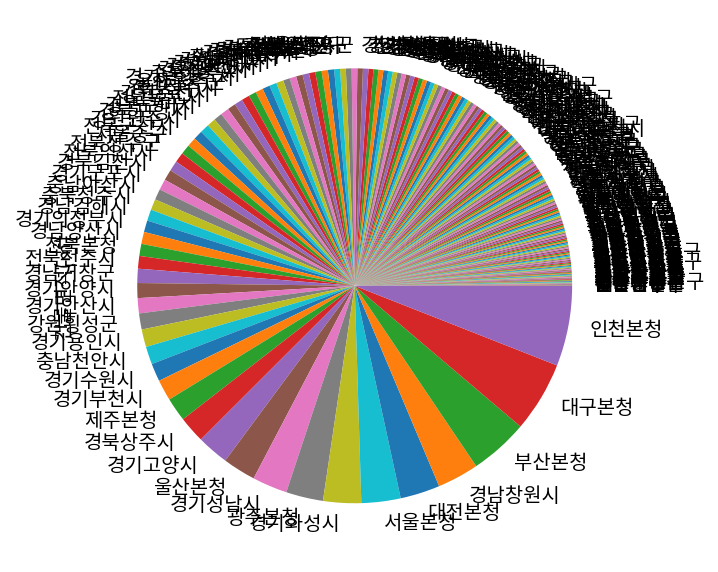

In [179]:
grouped = df['건물면적(㎡)'].groupby(df['자치단체'])
grouped.sum().sort_values().plot.pie(figsize=(5,5))

array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

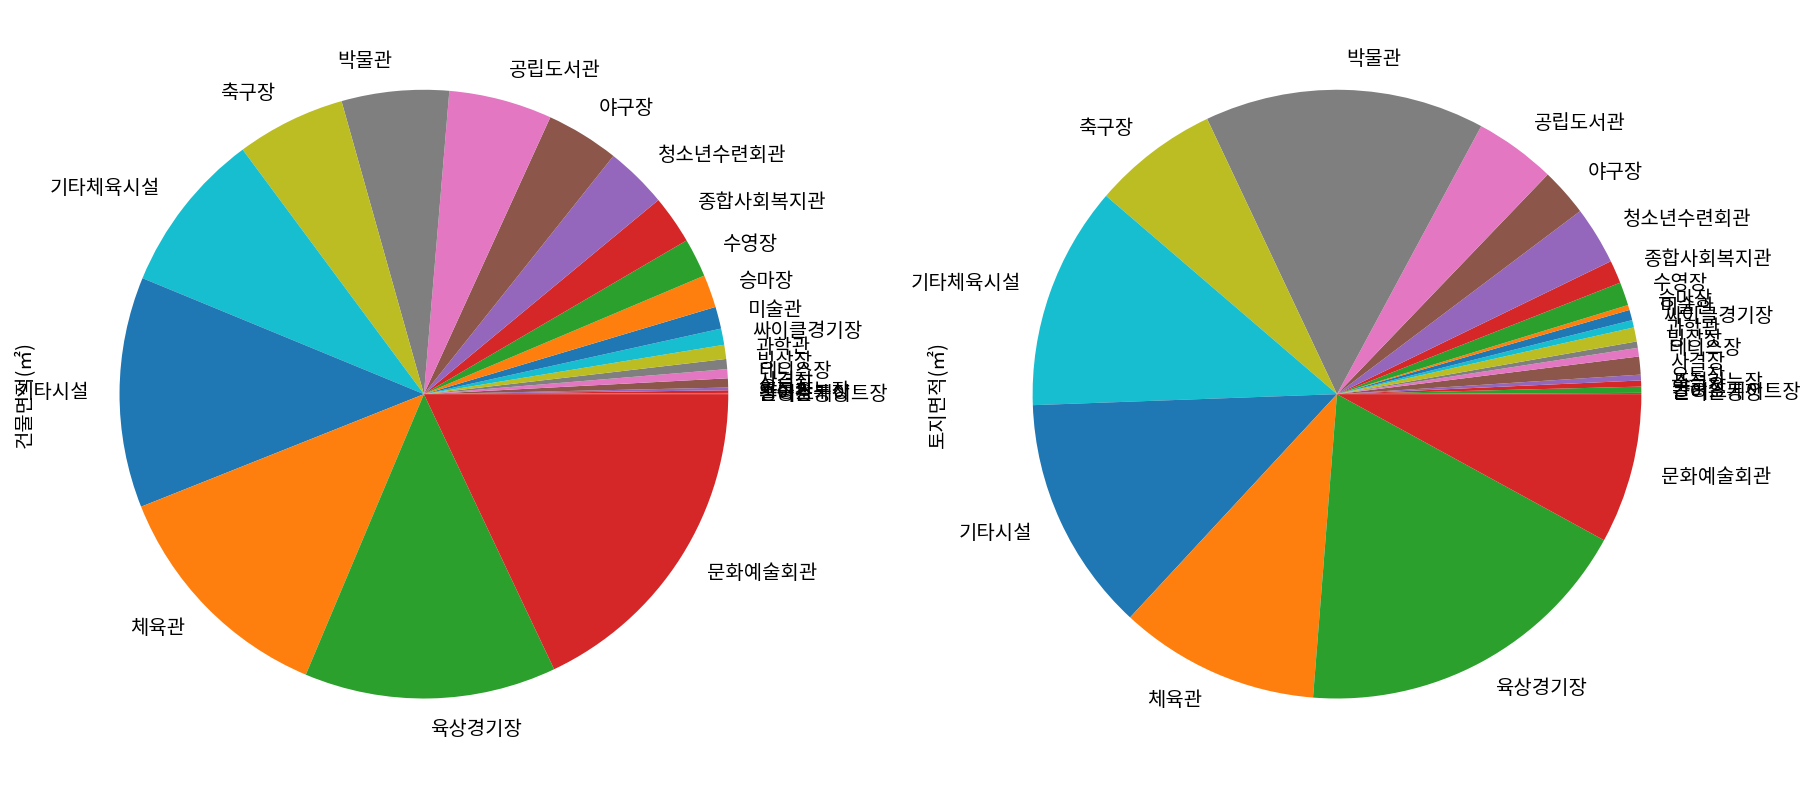

In [211]:
grouped1 = df['건물면적(㎡)'].groupby(df['시설구분'])
grouped2 = df['토지면적(㎡)'].groupby(df['시설구분'])

pd.concat([grouped1.sum().sort_values().to_frame(),
           grouped2.sum().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(15,15), legend=False)

array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

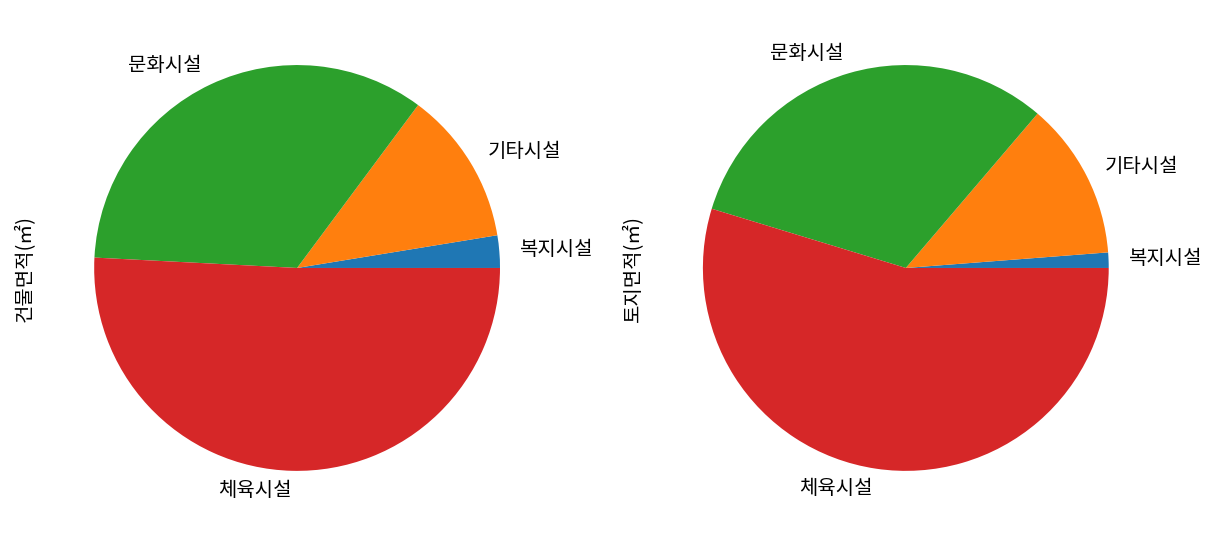

In [212]:
grouped1 = df['건물면적(㎡)'].groupby(df['시설유형'])
grouped2 = df['토지면적(㎡)'].groupby(df['시설유형'])
pd.concat([grouped1.sum().sort_values().to_frame(),
           grouped2.sum().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(10,10),legend=False)

In [204]:
def grouped_sido(d):
    d = d['자치단체']
    return d[:2]
df['시도별'] = df.apply(grouped_sido, axis=1)

array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

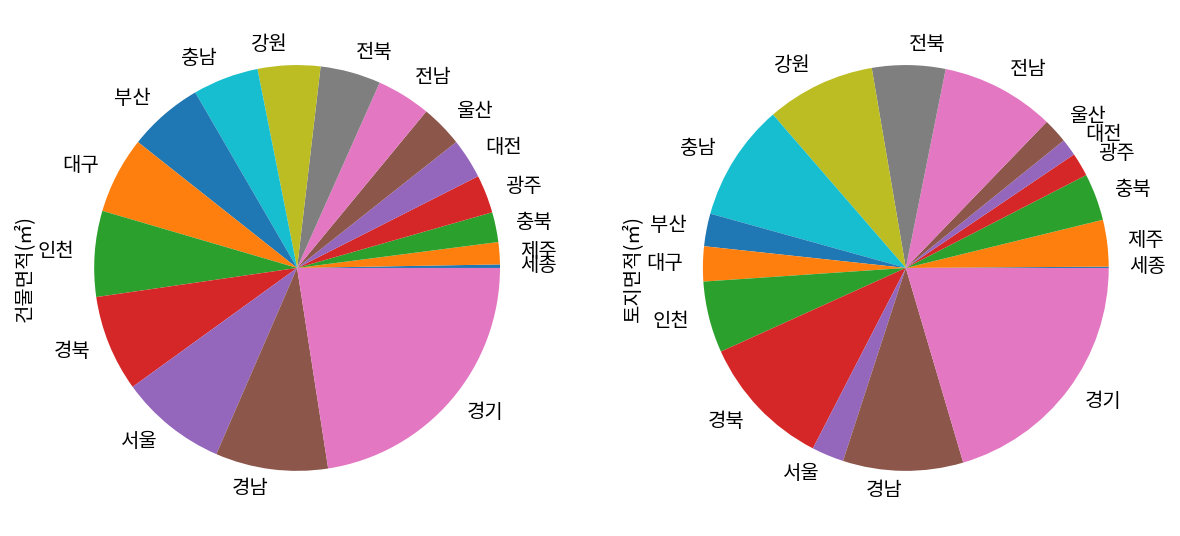

In [208]:
grouped1 = df['건물면적(㎡)'].groupby(df['시도별'])
grouped2 = df['토지면적(㎡)'].groupby(df['시도별'])
pd.concat([grouped1.sum().sort_values().to_frame(),
           grouped2.sum().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(10,10), legend=False)

array([<AxesSubplot:ylabel='관리인력'>], dtype=object)

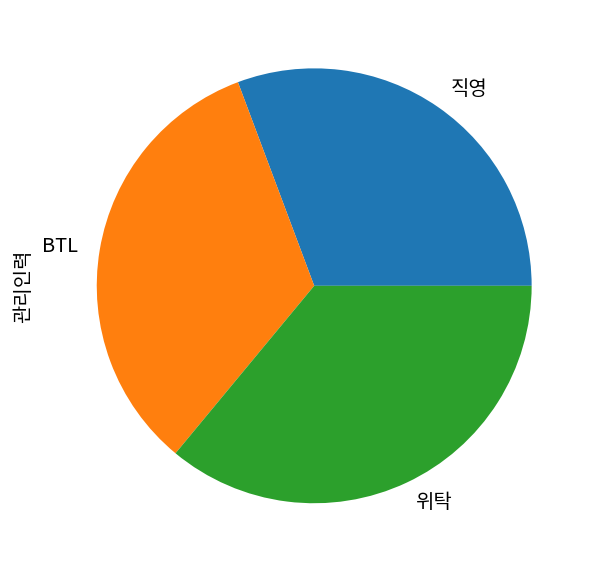

In [224]:
grouped1 = df['관리인력'].groupby(df['운영방식'])
grouped1.mean().sort_values().plot.pie(subplots=True,figsize=(5,5),legend=False)

In [225]:
df

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별
순번,,,,,,,,,,,,,,,,,,,,
1,서울본청,문화시설,박물관,서울도시건축전시관,2019-01-11,위탁,2988,1558,0,290895,28168,21047,526,526,20521,40,2232,60,-2172,서울
2,서울본청,문화시설,박물관,서울역사박물관,1998-02-03,직영,20883,99728,259,1669855,34411,34411,341,14270,20140,80,14434,818,-13617,서울
3,서울본청,문화시설,박물관,한성백제박물관,2011-12-31,직영,19423,14894,140,788020,79530,79530,2485,15906,63624,40,13101,242,-12858,서울
4,서울본청,문화시설,문화예술회관,동대문디자인플라자,2013-11-20,위탁,86574,62108,40,11739138,421222,384332,10128,39991,344341,40,14692,15477,784,서울
5,서울본청,문화시설,과학관,서울시립과학관,2016-06-30,직영,12330,25875,84,216986,42349,42349,2231,7354,34995,40,4807,308,-4499,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,제주본청,체육시설,축구장,제주종합경기장 주경기장,1968-07-30,직영,11399,30327,1,147498,31491,31491,1903,23087,8403,40,853,28,-824,제주
860,제주본청,체육시설,수영장,서귀포국민체육센터,2005-12-28,위탁,7837,7927,17,246013,12154,12154,191,3374,8781,60,1182,354,-828,제주
861,제주본청,체육시설,기타체육시설,공천포전지훈련센터,2010-04-23,직영,5822,148462,3,50416,26800,26800,940,8401,16875,40,131,22,-110,제주


<AxesSubplot:xlabel='시도별'>

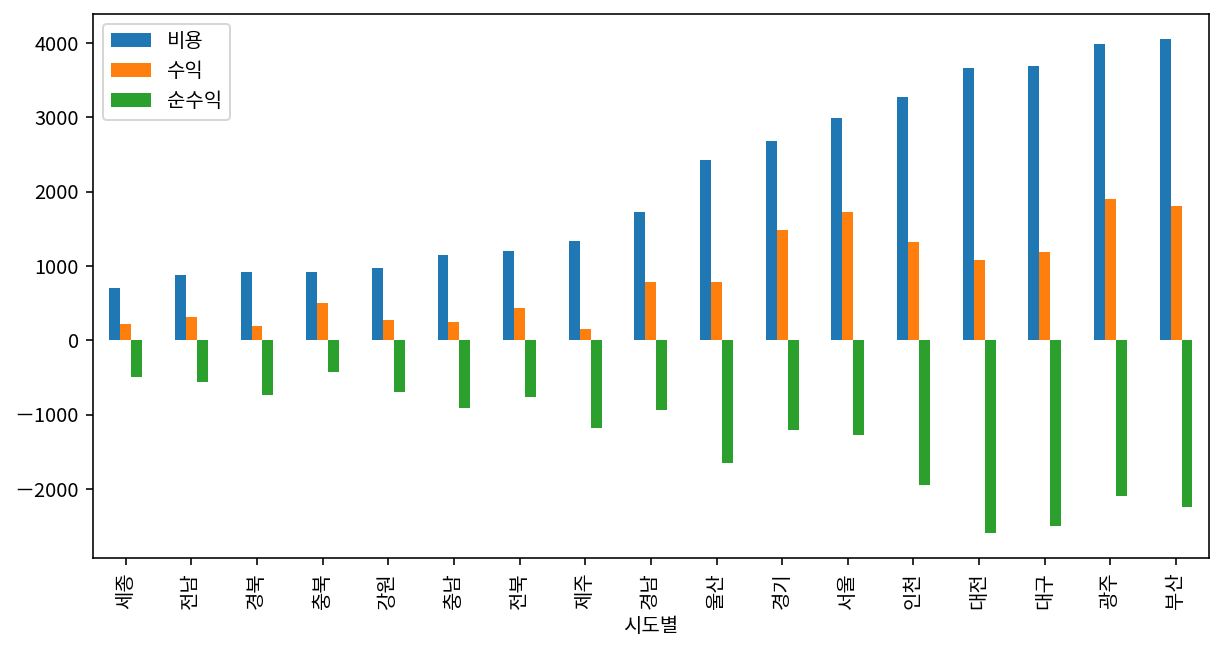

In [238]:
grouped1 = df['비용'].groupby(df['시도별'])
grouped2 = df['수익'].groupby(df['시도별'])
grouped3 = df['순수익'].groupby(df['시도별'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame(),
          grouped3.mean().sort_values().to_frame()], axis=1,)\
            .plot.bar(figsize=(10,5), legend=True)

array([<AxesSubplot:ylabel='연간이용인원'>, <AxesSubplot:ylabel='관리인력'>],
      dtype=object)

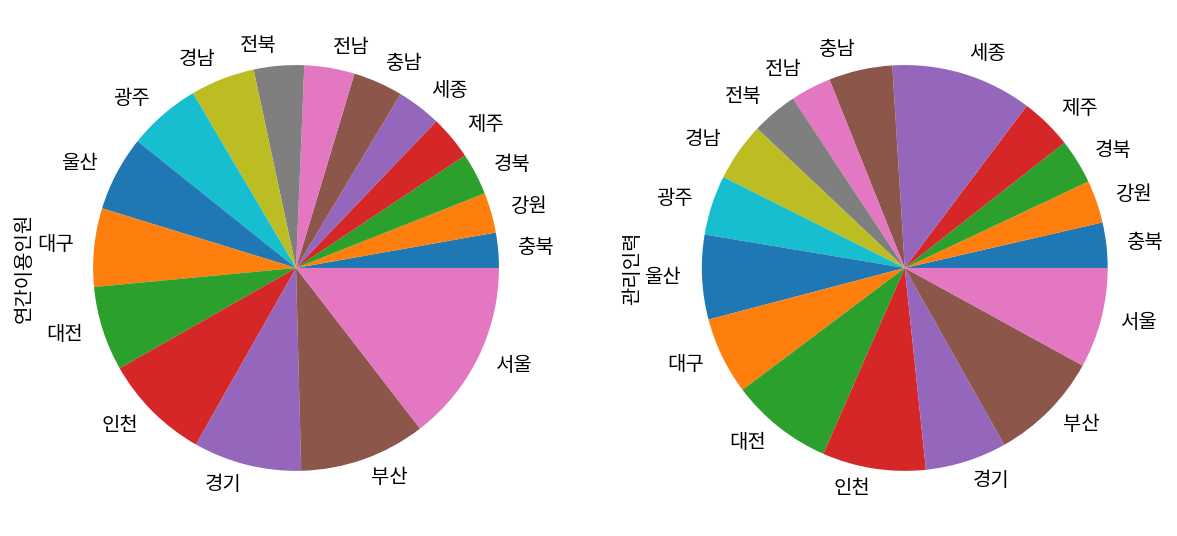

In [242]:
grouped1 = df['연간이용인원'].groupby(df['시도별'])
grouped2 = df['관리인력'].groupby(df['시도별'])
#grouped3 = df['순수익'].groupby(df['시도별'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True, figsize=(10,5), legend=False) 
# 세종, 서울

<AxesSubplot:xlabel='운영방식'>

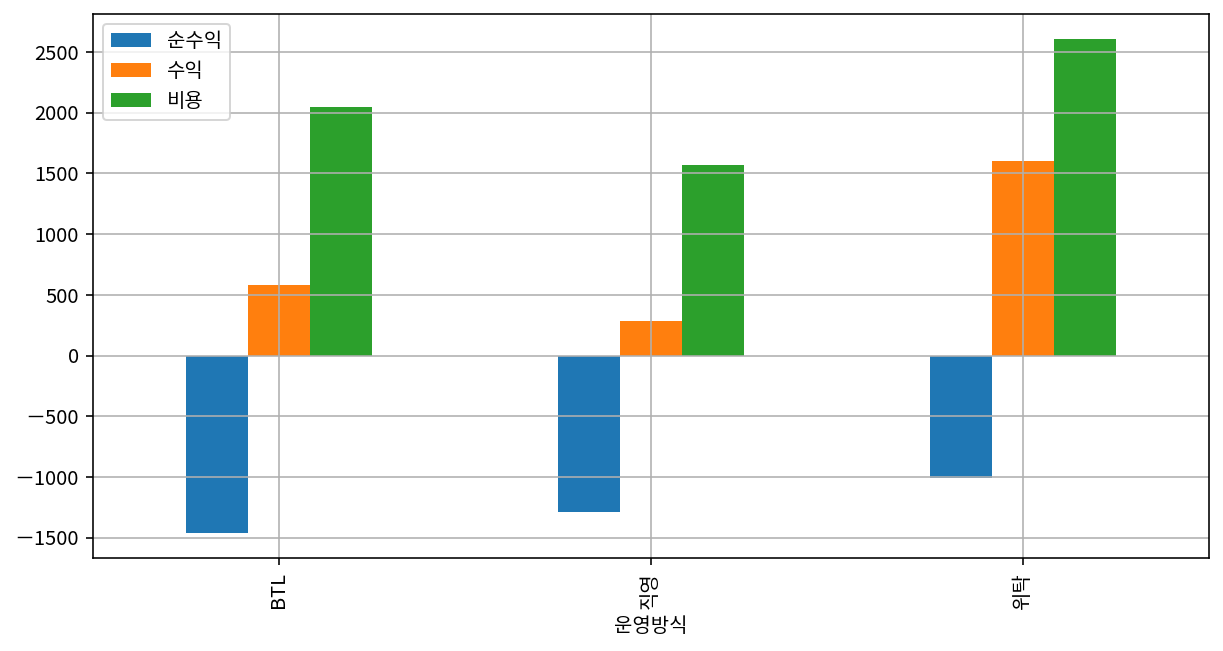

In [249]:
grouped1 = df['순수익'].groupby(df['운영방식'])
grouped2 = df['수익'].groupby(df['운영방식'])
grouped3 = df['비용'].groupby(df['운영방식'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame(),
          grouped3.mean().sort_values().to_frame()], axis=1,)\
            .plot.bar( figsize=(10,5), legend=True, grid=True) 
# 세종, 서울

In [253]:
grouped1 = df['운영방식'].groupby(df['시도별'])
grouped1.sum()

시도별
강원    직영직영위탁위탁위탁위탁위탁위탁직영직영직영직영직영직영위탁직영위탁직영위탁직영직영직영직영...
경기    위탁위탁위탁위탁위탁직영직영직영직영직영직영위탁위탁위탁위탁위탁직영직영직영직영직영직영직영...
경남    직영직영위탁위탁위탁위탁BTL위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁직영직...
경북    직영직영위탁직영위탁직영직영위탁위탁위탁직영직영BTL위탁위탁직영직영BTL직영직영직영직영...
광주                            직영위탁위탁BTL위탁위탁위탁위탁위탁위탁위탁위탁
대구    위탁직영직영위탁위탁직영직영직영위탁위탁위탁직영위탁직영위탁위탁위탁위탁위탁위탁위탁위탁직영...
대전                           직영위탁직영위탁위탁위탁위탁위탁위탁직영위탁위탁위탁
부산    직영직영직영위탁위탁직영위탁위탁직영위탁직영직영직영직영위탁직영위탁위탁직영위탁직영직영직영...
서울    위탁직영직영위탁직영직영직영직영위탁위탁위탁위탁위탁위탁위탁위탁직영위탁위탁위탁위탁위탁위탁...
세종                                             위탁직영직영직영
울산    직영BTL직영위탁위탁위탁위탁위탁위탁직영직영위탁위탁위탁직영직영위탁위탁위탁직영위탁위탁위...
인천    직영직영직영위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁위탁직영직영위탁위탁위탁...
전남    위탁직영직영직영위탁직영직영직영직영직영직영직영직영직영직영직영직영직영직영직영직영직영직영...
전북    직영위탁위탁직영직영위탁위탁위탁위탁직영직영직영직영위탁직영직영직영직영직영BTL직영직영B...
제주                               위탁직영직영직영직영직영직영위탁직영직영직영
충남    직영직영위탁직영직영직영직영직영BTL위탁위탁위탁BTL위탁BTL직영직영직영직영직영직영직...
충북    위탁직영직영직영직영직영위탁위탁위탁위탁위탁위탁위탁위탁직영직영위탁직영직영위탁직영직영직영...
Name: 운영방식, dtype: object

In [254]:
df[['시도별','운영방식','비용','수익','순수익']]

,시도별,운영방식,비용,수익,순수익
순번,,,,,
1,서울,위탁,2232,60,-2172
2,서울,직영,14434,818,-13617
3,서울,직영,13101,242,-12858
4,서울,위탁,14692,15477,784
5,서울,직영,4807,308,-4499
...,...,...,...,...,...
859,제주,직영,853,28,-824
860,제주,위탁,1182,354,-828
861,제주,직영,131,22,-110


In [257]:
df.groupby(['시도별', '운영방식']).mean()

건물면적(㎡)        토지면적(㎡)       관리인력         연간이용인원  \
시도별 운영방식                                                          
강원  위탁     8741.105263   61501.684211  10.526316  120582.000000   
    직영    10100.161290   89576.903226  14.774194  129747.677419   
경기  BTL    8547.000000    7000.000000  40.000000  529592.000000   
    위탁    11767.047945   47354.486301  24.767123  345922.787671   
    직영     7033.285714   37670.142857  25.714286  322836.301587   
경남  BTL    8122.000000   31565.000000  27.000000  143356.000000   
    위탁    10703.660000   48997.140000  26.840000  323219.560000   
    직영     6779.893617   39842.595745   8.404255   74669.510638   
경북  BTL   15644.000000   22126.333333  26.666667  128289.666667   
    위탁     6520.117647  106571.117647  16.235294  158908.176471   
    직영     9355.064516   47980.935484  12.580645  124951.983871   
광주  BTL   57646.000000   52639.000000  20.000000  692163.000000   
    위탁    18785.000000   71397.600000  13.700000  183416.800000   
    직영    47087.000000   88422.000000  64.000000  210545.000000   
대구  위탁    17023.619048   32215.095238  19.761905  208713.619048   
    직영    28815.000000   73497.625000  34.625000  344625.625000   
대전  위탁    24698.900000   53831.800000  25.700000  314479.900000   
    직영    19981.333333   26912.000000  51.333333  103127.333333   
부산  위탁    14318.941176   26059.941176  41.058824  416234.823529   
    직영    16591.300000   37005.200000  28.500000  380067.000000   
서울  BTL   18607.000000   18585.000000   0.000000       0.000000   
    위탁     9381.622951   13244.901639  27.590164  629581.508197   
    직영    13486.941176   20002.529412  44.647059  405570.117647   
세종  위탁     3696.000000   10125.000000  31.000000  361422.000000   
    직영     7725.666667   12647.666667  47.666667   65069.000000   
울산  BTL   14409.000000   33058.000000  29.000000  186213.000000   
    위탁    13202.117647   40065.470588  11.647059  178042.176471   
    직영    10581.125000   23002.625000  56.250000  366244.375000   
인천  위탁    23364.480000   97042.240000  24.320000  366532.120000   
    직영    14641.800000   32319.400000  69.800000  192092.600000   
전남  BTL   11660.500000    8245.500000  13.500000   54200.000000   
    위탁     7873.666667   78737.000000  13.333333  184194.000000   
    직영     7660.104167   80621.479167  12.416667  160614.770833   
전북  BTL   10227.500000   15604.000000  29.000000  285763.500000   
    위탁    23235.000000  147074.142857  20.142857  251109.142857   
    직영     9358.466667   53149.733333  11.833333  127710.933333   
제주  위탁     9646.000000  113479.000000  16.000000  332496.500000   
    직영    16701.222222  162320.333333  16.111111   95597.777778   
충남  BTL    9116.000000   32671.142857  18.285714  130914.285714   
    위탁    11710.214286  108264.071429  17.000000  221127.000000   
    직영     7892.885714   71380.285714  20.971429  135142.542857   
충북  위탁     5964.545455   47708.636364  11.181818   92951.909091   
    직영     7105.782609   51425.434783  15.260870  118526.130435   

                   건립비용           취득가액        감가상각액      감가상각 누계액  \
시도별 운영방식                                                            
강원  위탁     22338.684211   22338.263158   604.473684   6111.947368   
    직영     27664.290323   23578.419355   727.741935   5782.774194   
경기  BTL    11188.000000   11188.000000   280.000000   3216.000000   
    위탁     36773.253425   33217.732877   668.904110   6978.698630   
    직영     20873.142857   17855.793651   402.492063   3412.476190   
경남  BTL    31001.000000   31001.000000   238.000000   4773.000000   
    위탁     28714.980000   24461.200000   594.400000   7441.660000   
    직영     16102.680851   14503.191489   367.106383   4336.617021   
경북  BTL    53096.333333   53096.333333  1297.000000  10729.666667   
    위탁     27269.411765   21076.647059   505.411765   5810.823529   
    직영     21214.774194   19710.774194   758.693548   4213.096774   
광주  BTL   127453.000000  127453.000000  2449.000000  12094.000000   
    위탁     58882.600000   58584.3

<AxesSubplot:xlabel='시도별,운영방식'>

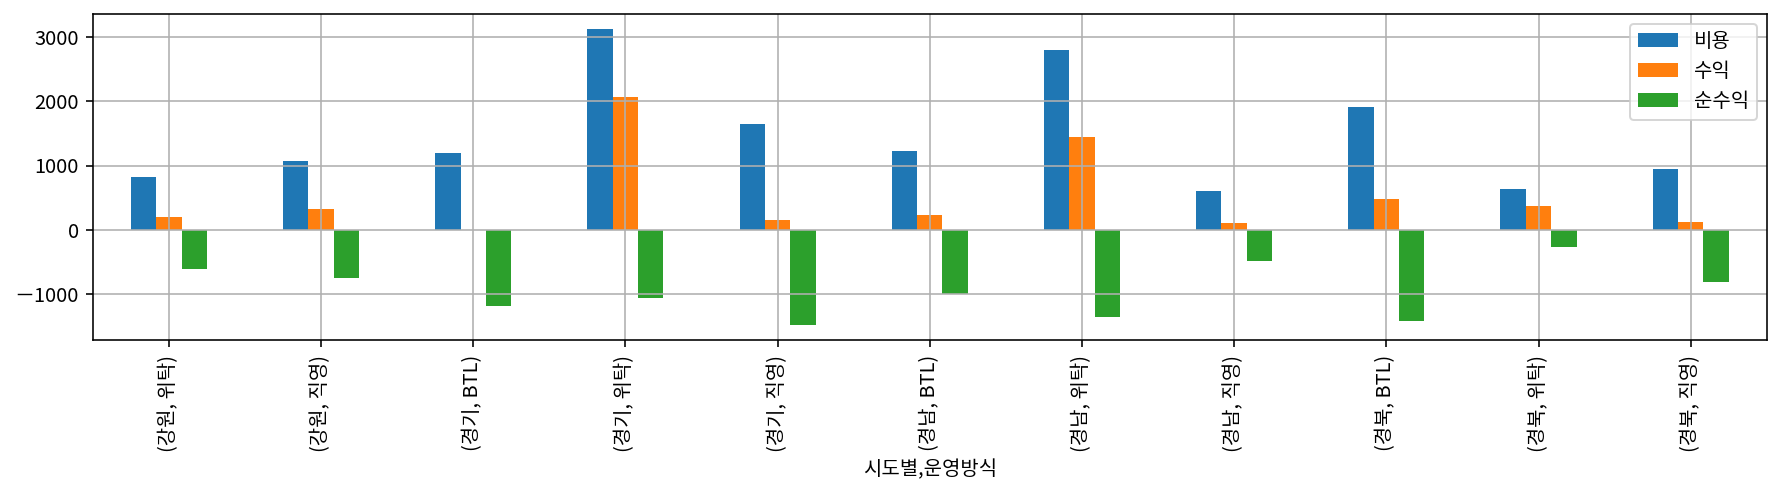

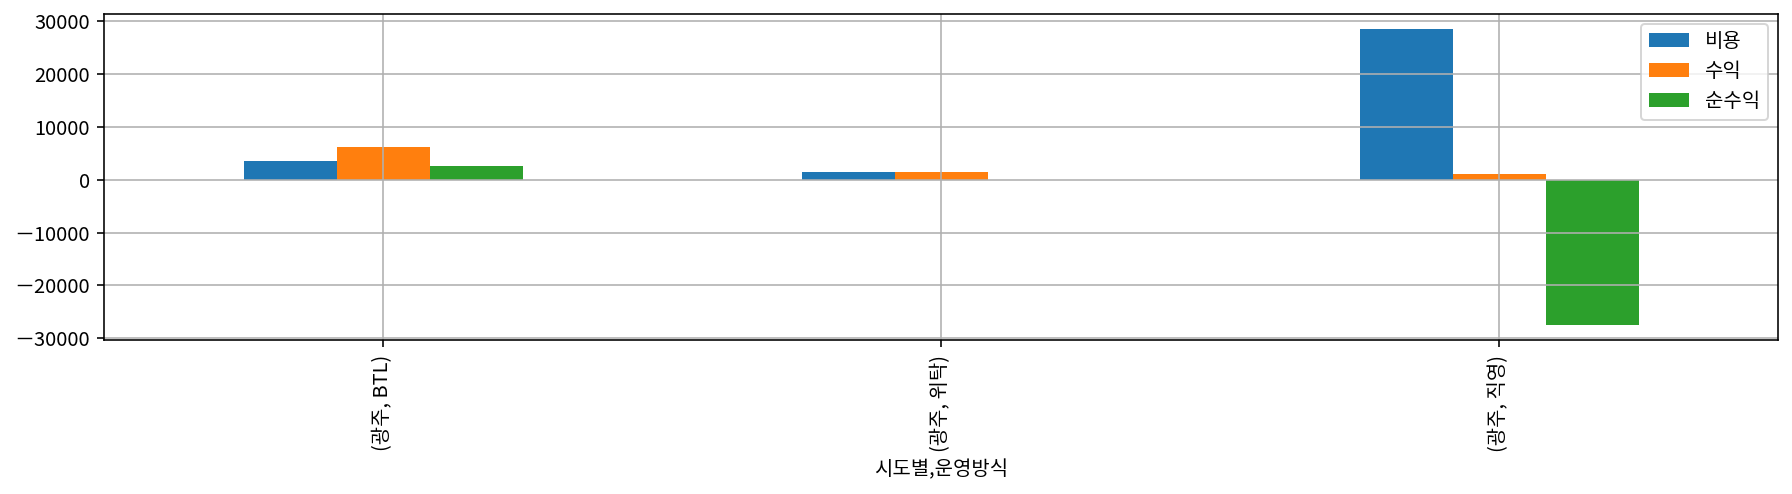

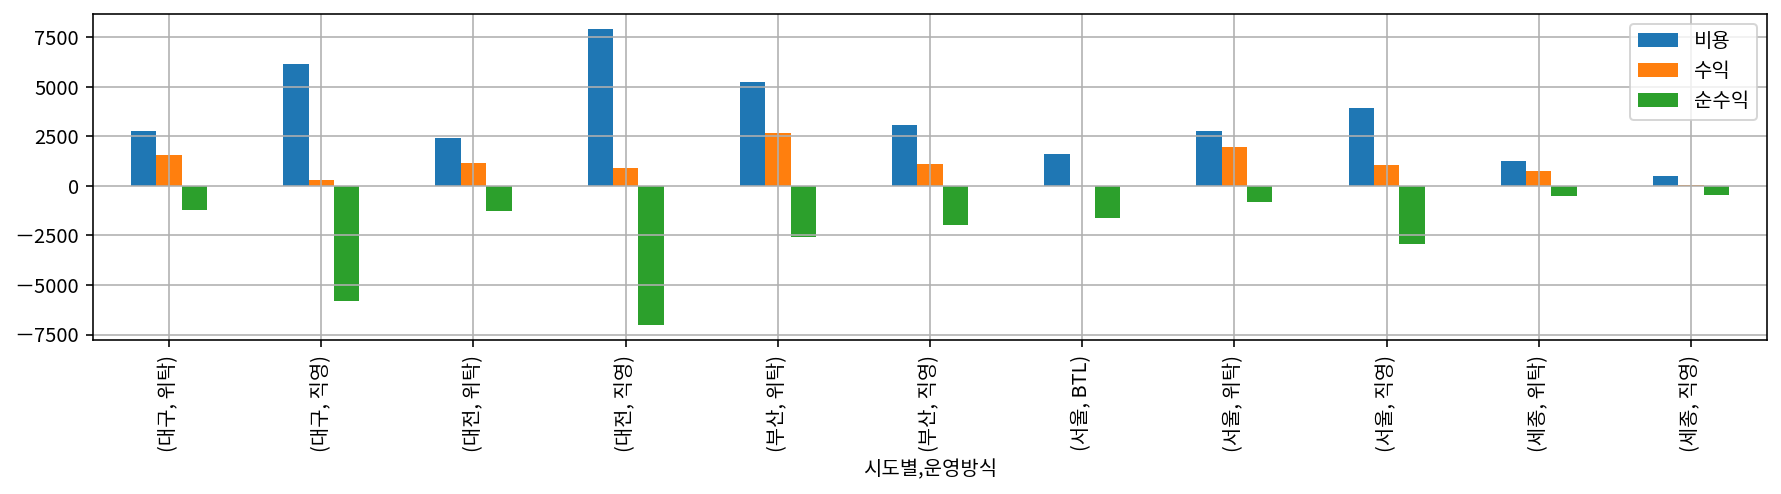

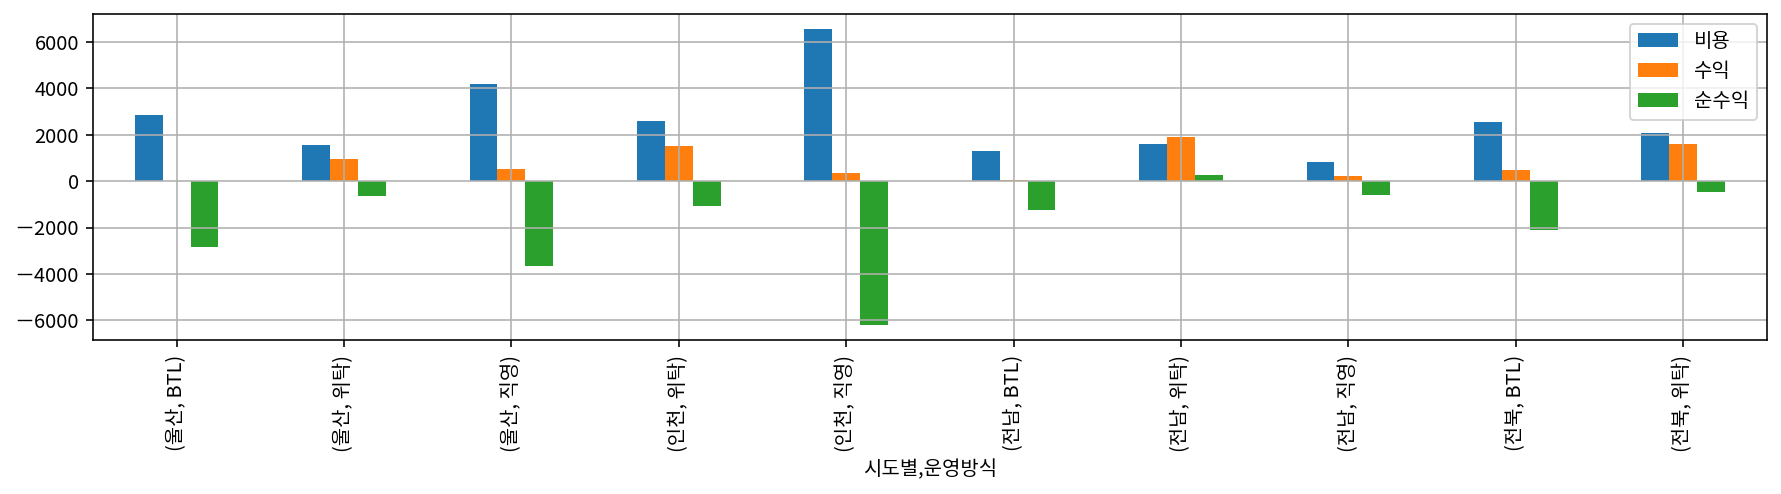

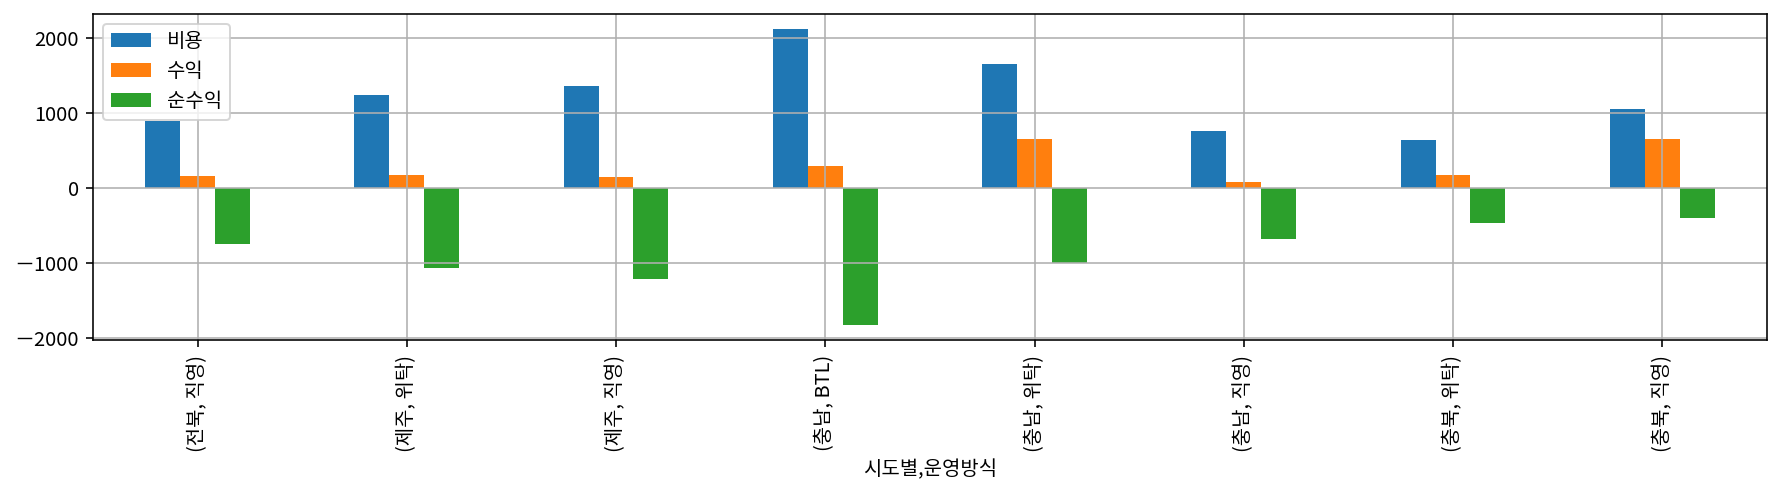

In [278]:
df.groupby(['시도별', '운영방식']).mean()[['비용','수익','순수익']].iloc[:11].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식']).mean()[['비용','수익','순수익']].iloc[11:14].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식']).mean()[['비용','수익','순수익']].iloc[14:25].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식']).mean()[['비용','수익','순수익']].iloc[25:35].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식']).mean()[['비용','수익','순수익']].iloc[35:].plot.bar(figsize=(15,3), grid=True)


<AxesSubplot:xlabel='시도별,운영방식,시설유형'>

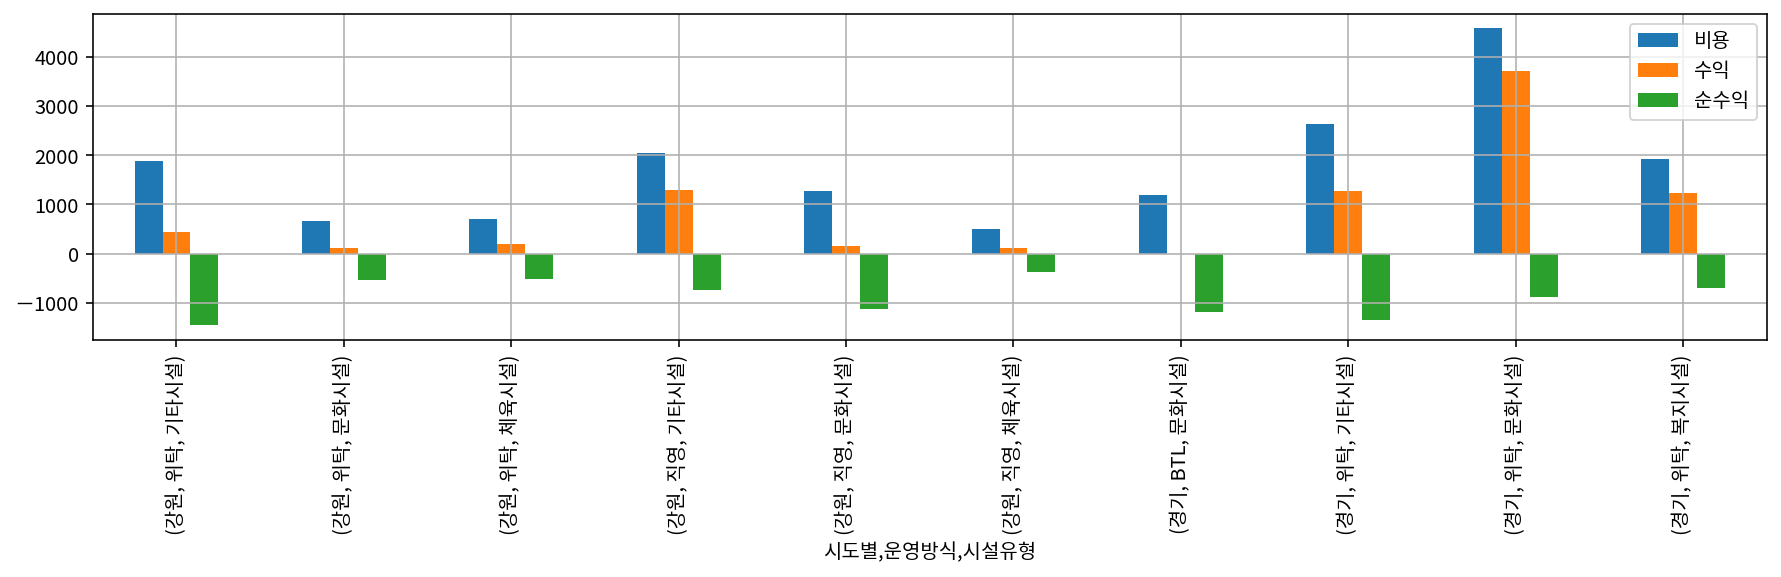

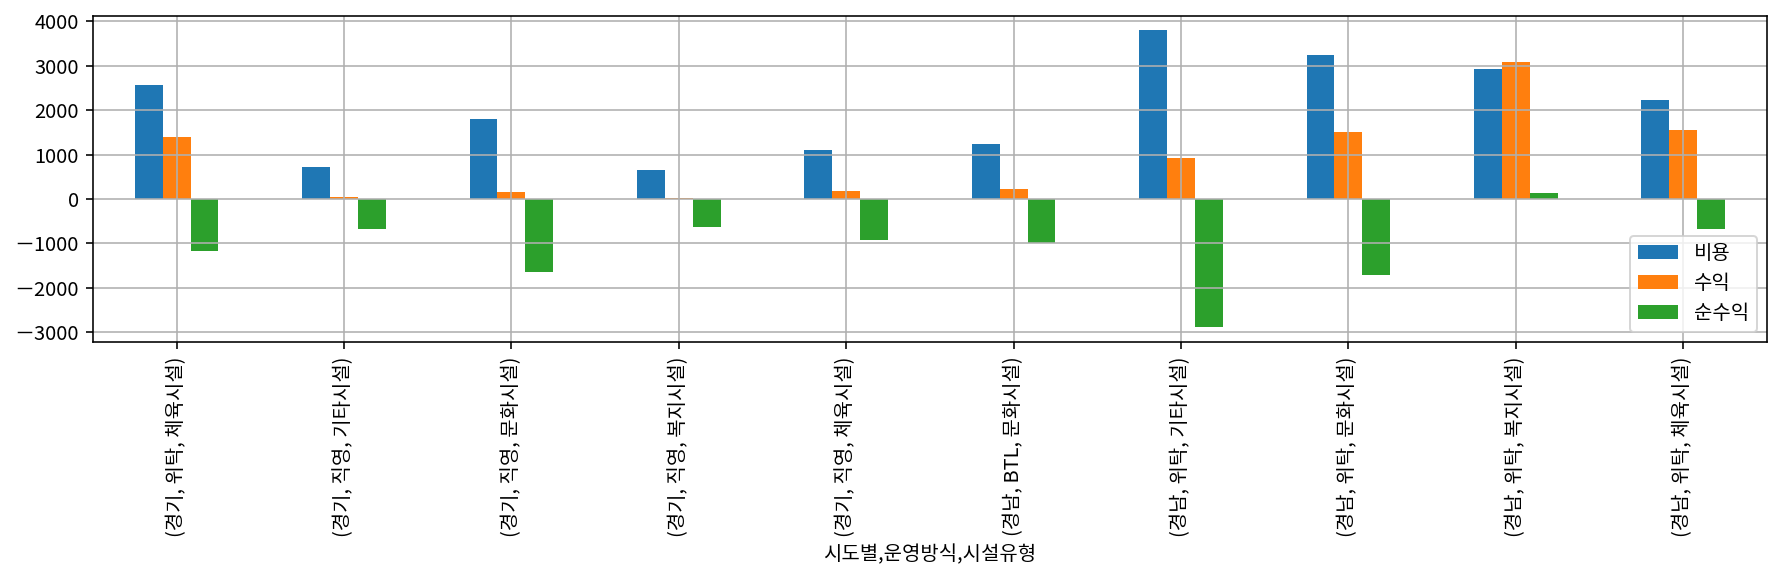

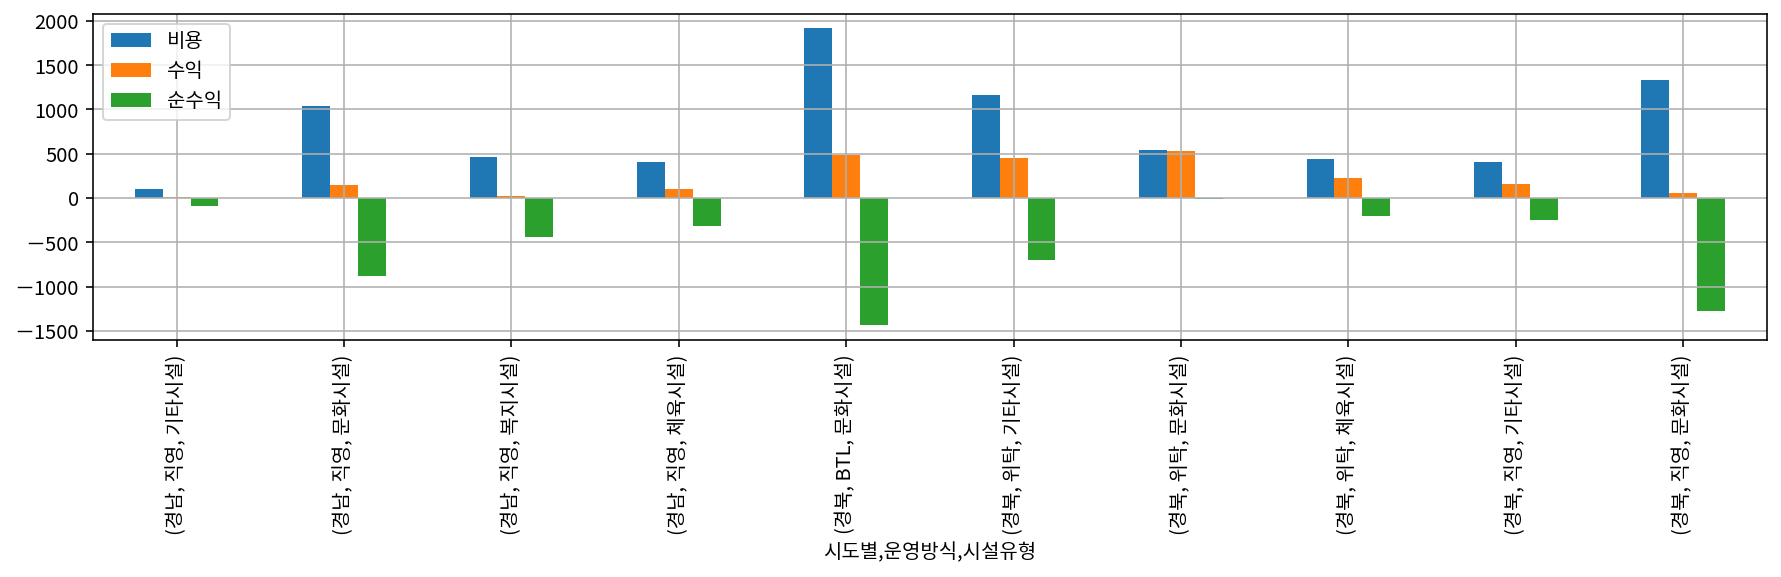

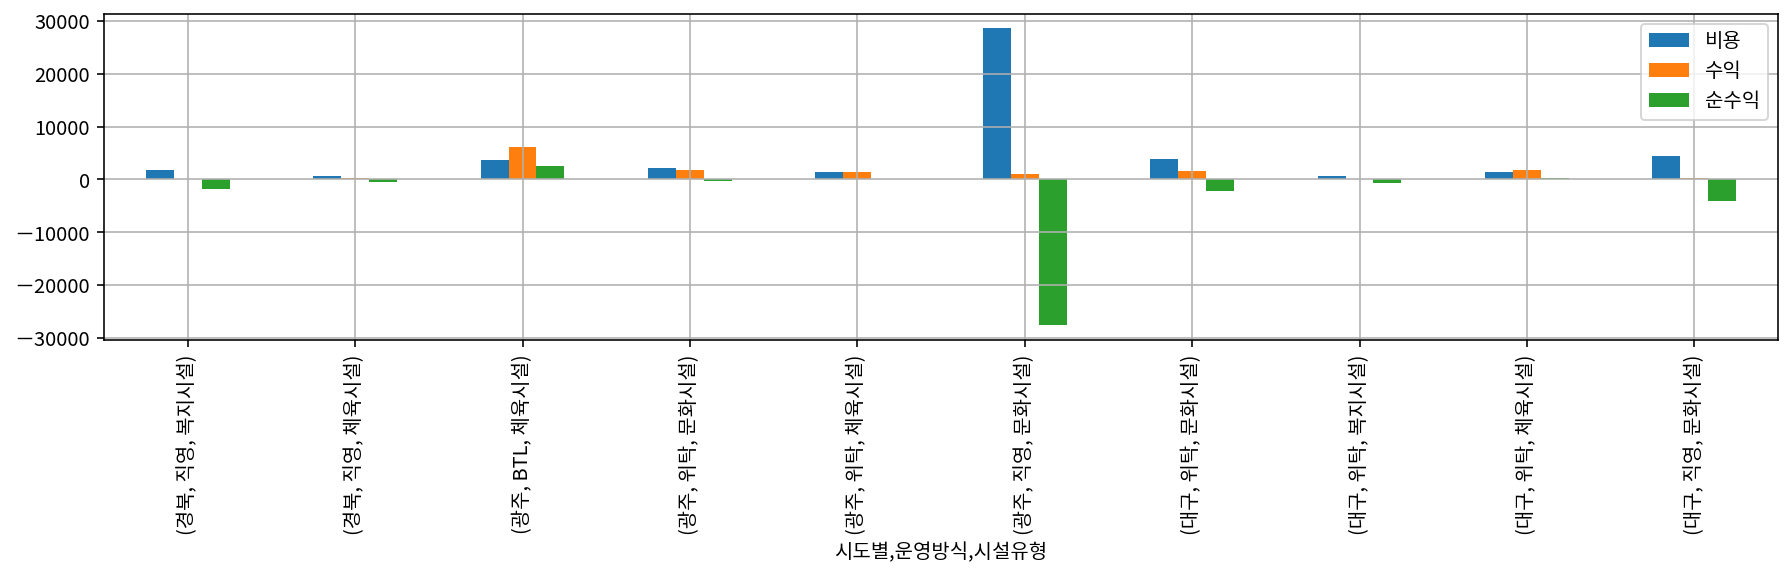

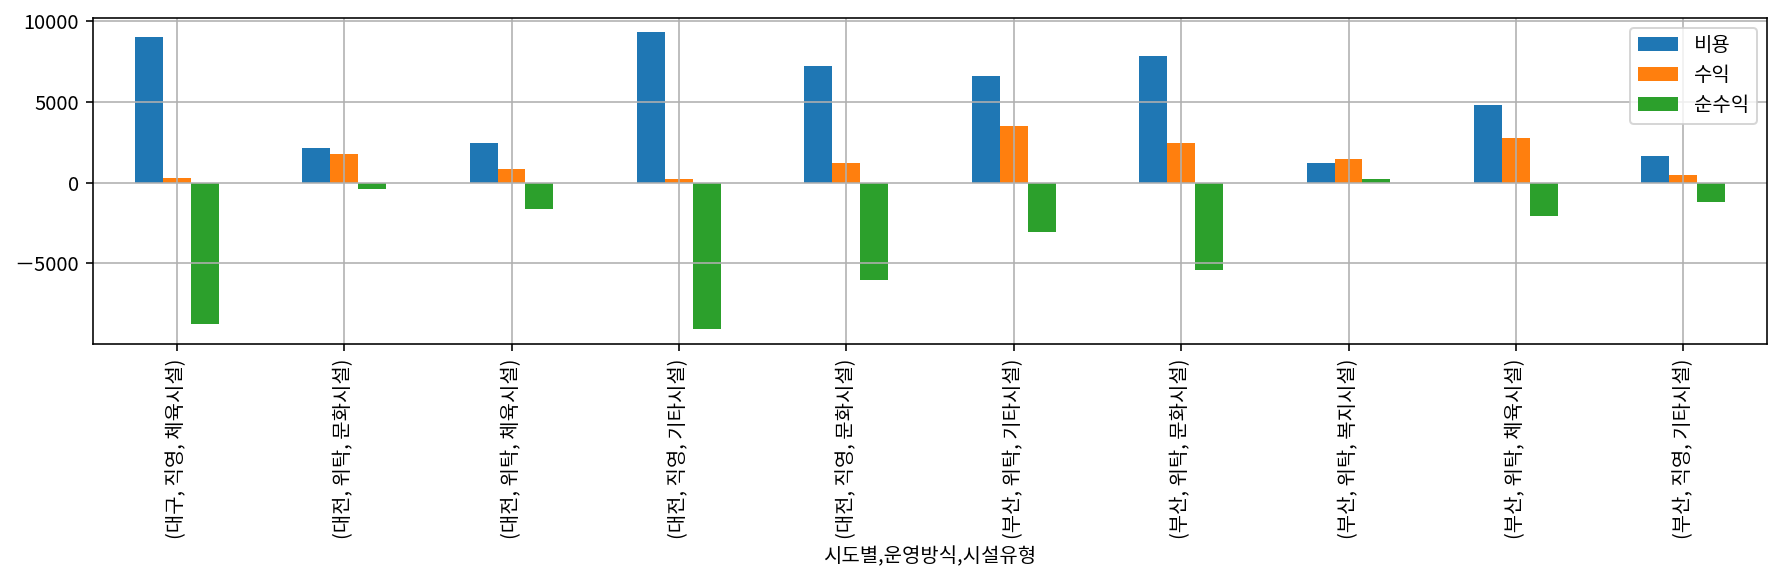

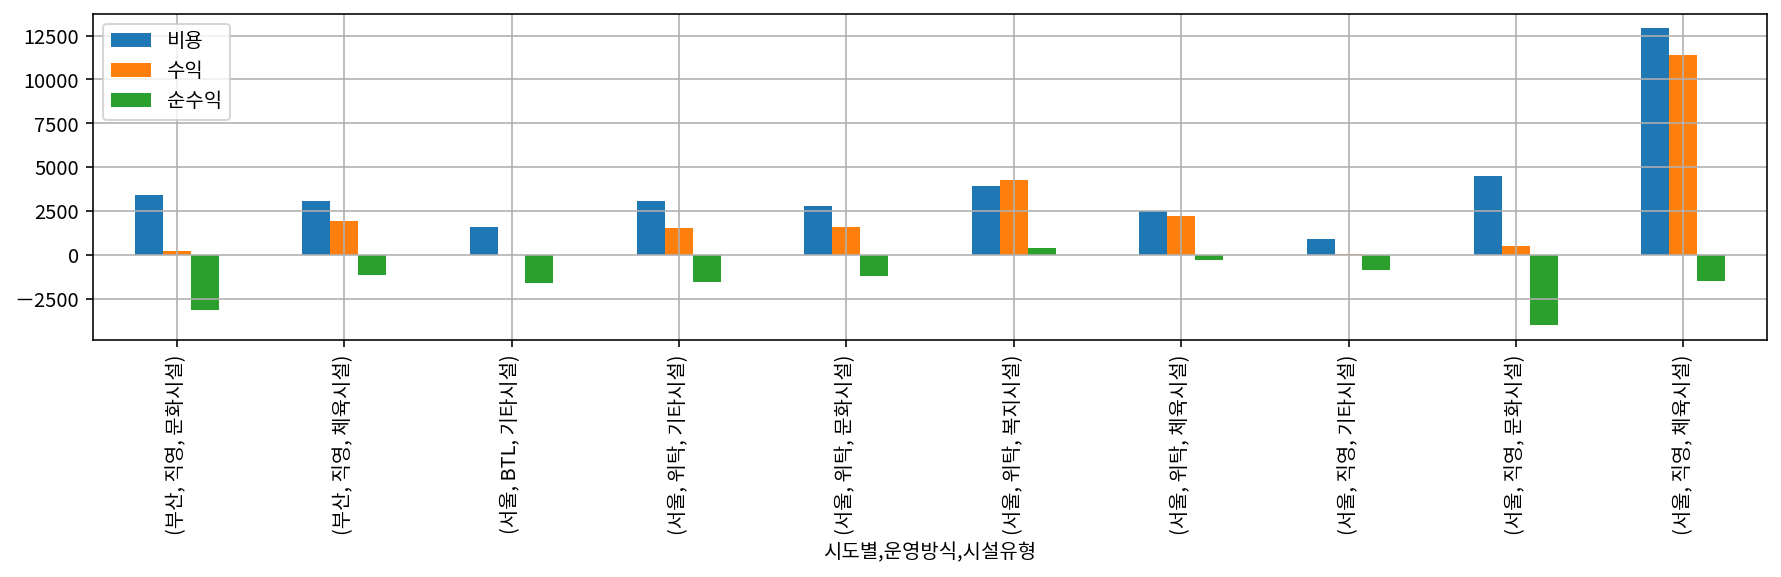

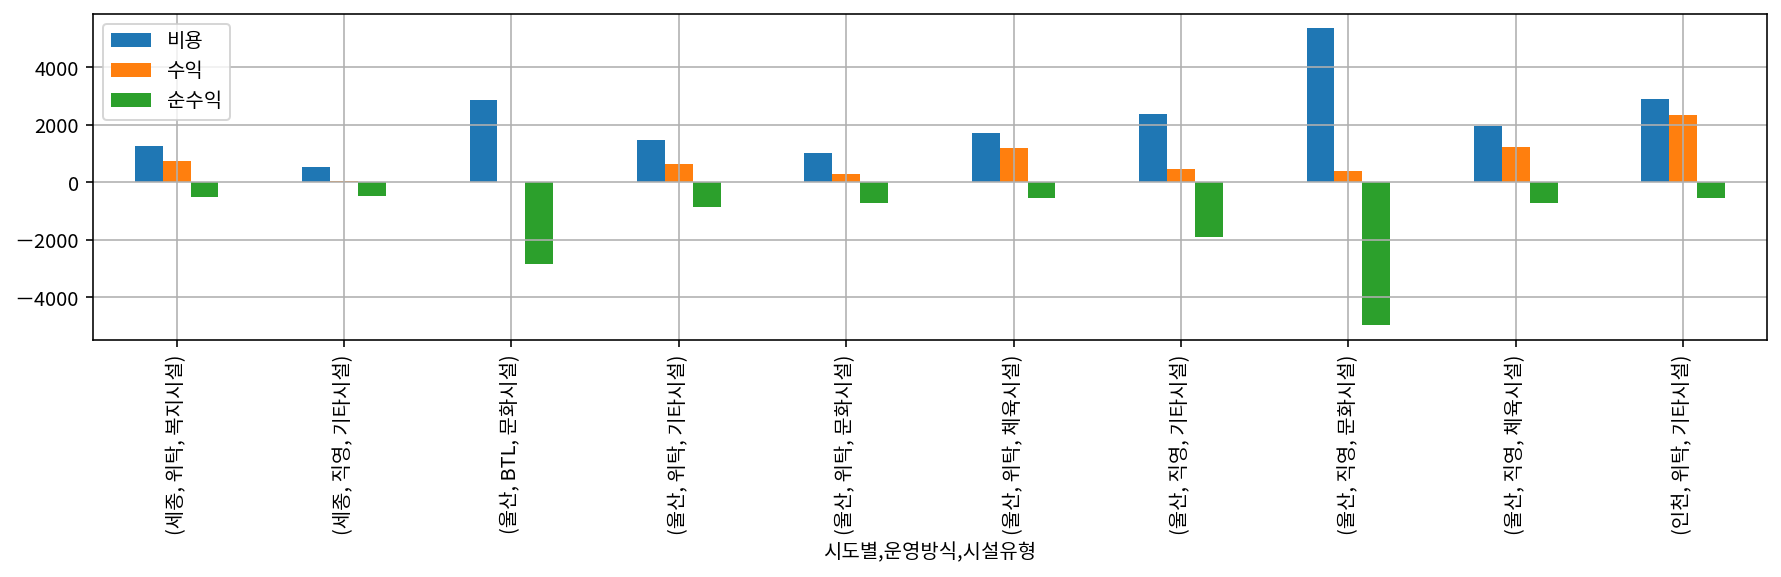

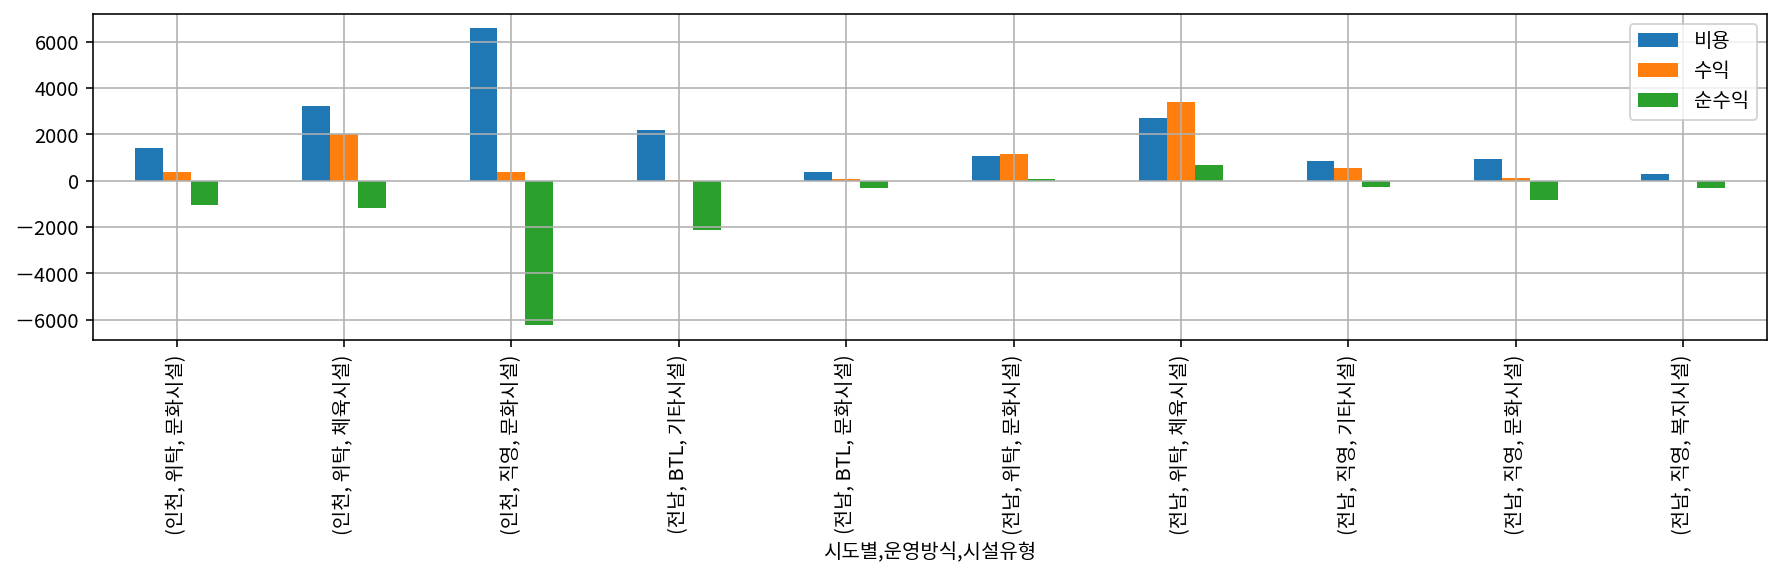

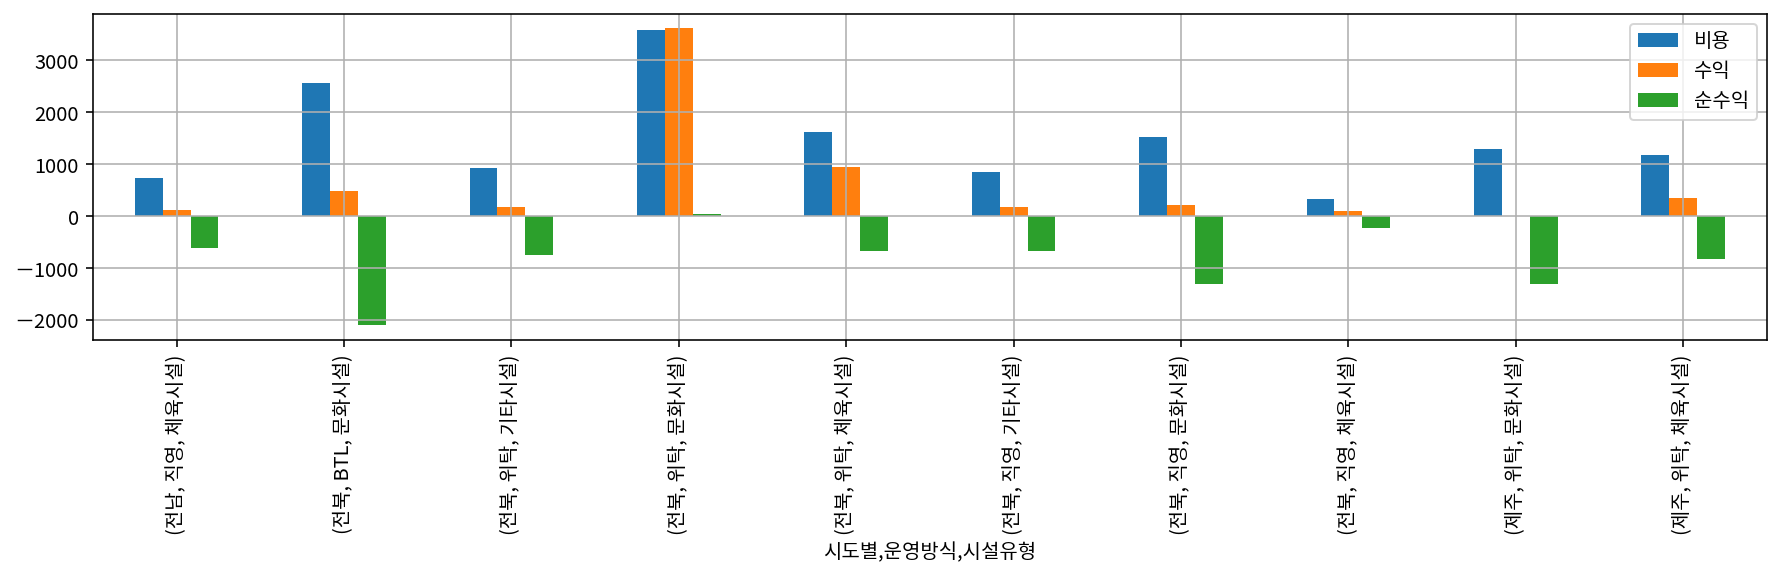

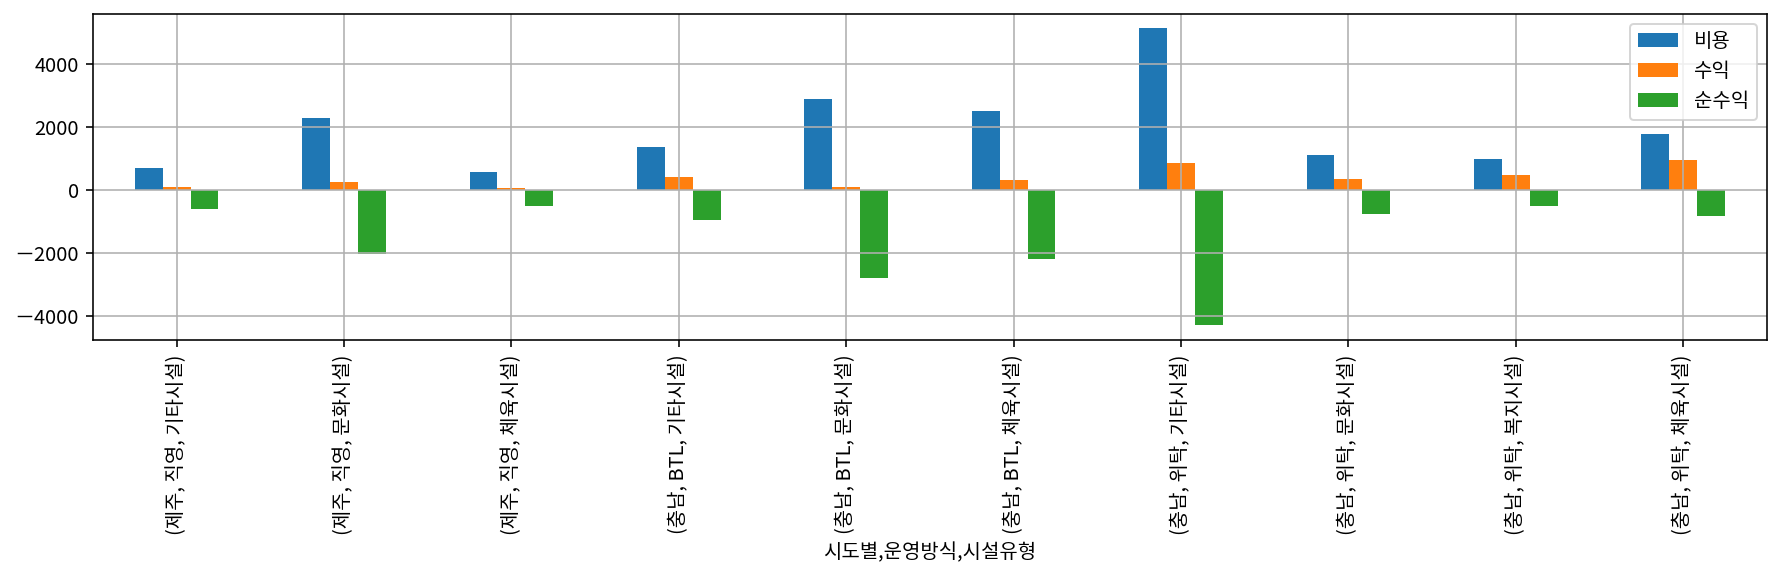

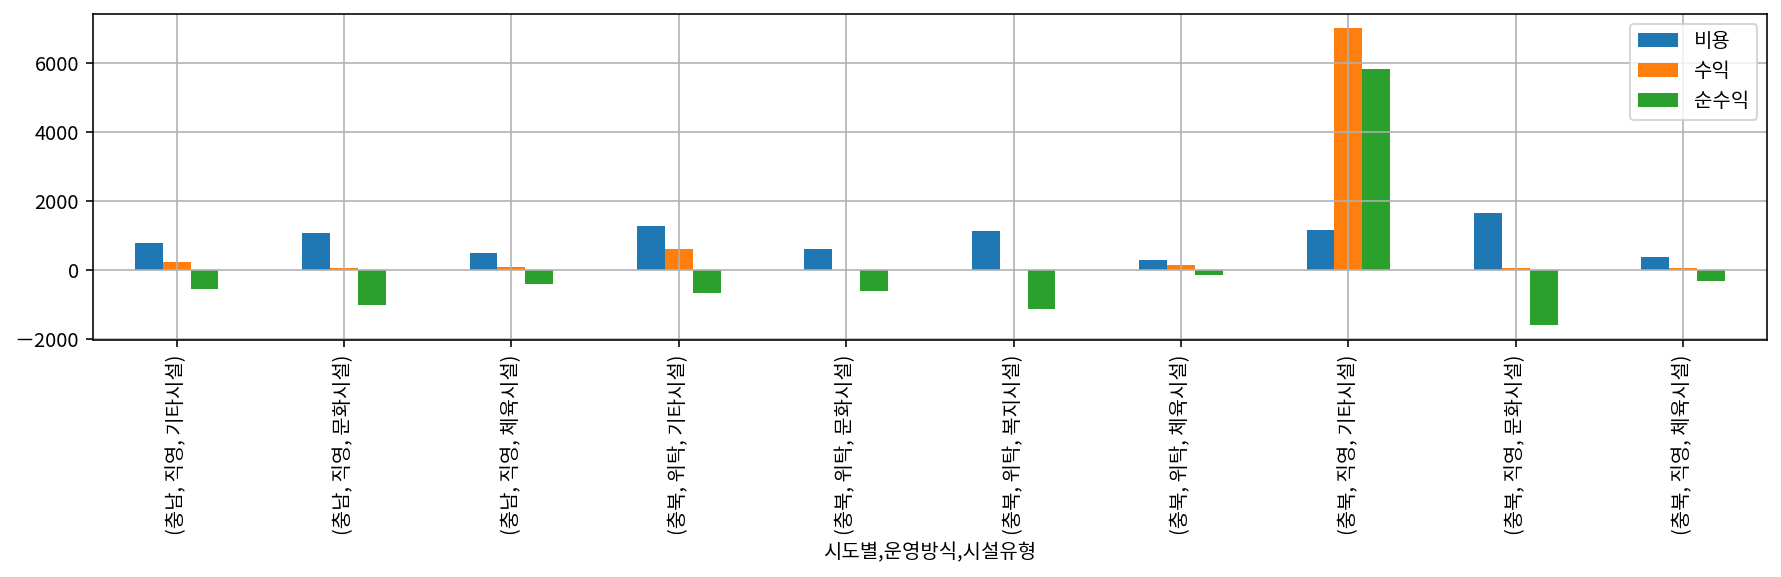

In [286]:
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[:10].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[10:20].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[20:30].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[30:40].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[40:50].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[50:60].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[60:70].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[70:80].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[80:90].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[90:100].plot.bar(figsize=(15,3), grid=True)
df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[100:110].plot.bar(figsize=(15,3), grid=True)

array([<AxesSubplot:title={'center':'관리인력'}, xlabel='시도별,시설유형'>,
       <AxesSubplot:title={'center':'연간이용인원'}, xlabel='시도별,시설유형'>],
      dtype=object)

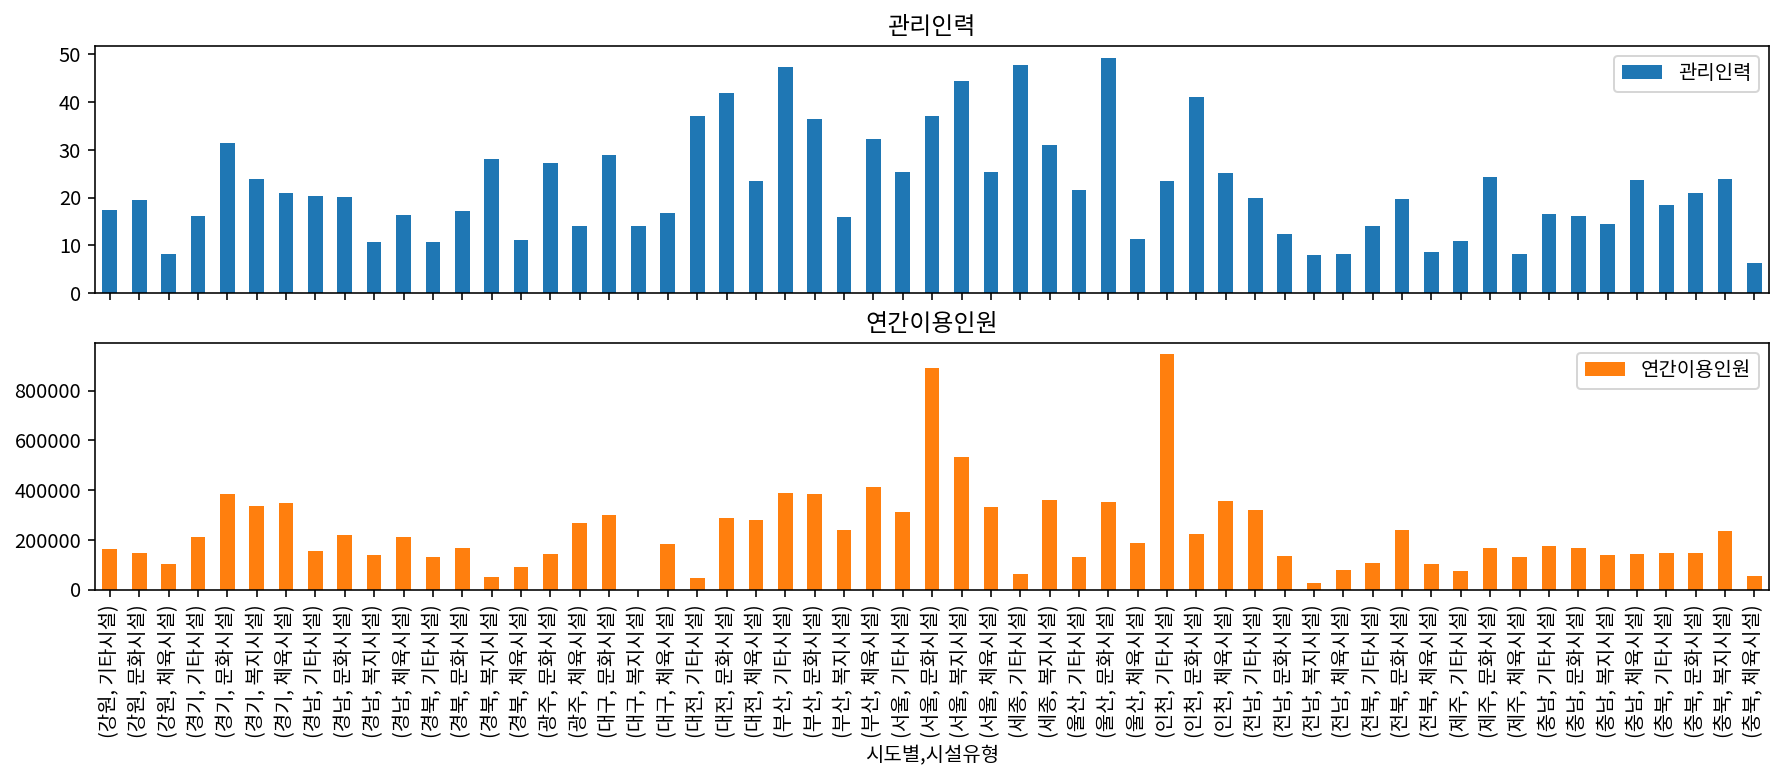

In [297]:
df.groupby(['시도별', '시설유형']).mean()[['관리인력','연간이용인원']].plot.bar(subplots=True,figsize=(15,5))

In [298]:
df.groupby(['시도별', '시설유형']).mean()

건물면적(㎡)        토지면적(㎡)       관리인력         연간이용인원  \
시도별 시설유형                                                          
강원  기타시설   4782.571429   41092.571429  17.428571  165545.857143   
    문화시설   8326.875000  100255.250000  19.500000  149288.125000   
    체육시설  11573.259259   76062.370370   8.296296  102437.222222   
경기  기타시설   8678.526316   32764.500000  16.078947  212064.736842   
    문화시설   8840.463918   30856.113402  31.453608  385710.896907   
    복지시설   8802.687500   15085.812500  23.875000  336471.687500   
    체육시설  14262.389831   81601.813559  20.881356  347746.474576   
경남  기타시설   6467.647059   16848.764706  20.294118  156074.941176   
    문화시설   8496.200000   29234.600000  20.200000  218377.800000   
    복지시설   5950.750000   46887.500000  10.750000  140176.250000   
    체육시설  10070.659574   63893.765957  16.382979  213797.617021   
경북  기타시설   5402.933333   44651.333333  10.733333  131731.200000   
    문화시설   7226.828571   71147.885714  17.228571  169015.342857   
    복지시설  12760.000000   54064.000000  28.000000   52000.000000   
    체육시설  12614.354839   52867.612903  11.096774   93220.193548   
광주  문화시설  20544.750000   26094.500000  27.250000  145016.500000   
    체육시설  26300.500000   93832.375000  14.000000  269601.250000   
대구  문화시설  12975.058824   25520.705882  29.000000  301832.529412   
    복지시설   2488.000000    1117.000000  14.000000     300.000000   
    체육시설  33177.454545   75411.727273  16.818182  182594.363636   
대전  기타시설  10873.000000    6389.000000  37.000000   45682.000000   
    문화시설  17317.800000   26224.000000  41.800000  286956.400000   
    체육시설  29924.428571   68792.142857  23.571429  281959.571429   
부산  기타시설  11525.666667   14629.000000  47.333333  389540.000000   
    문화시설  17821.272727   26324.181818  36.454545  384288.363636   
    복지시설   3656.000000    2297.000000  16.000000  241119.000000   
    체육시설  15499.136364   38516.954545  32.227273  410928.227273   
서울  기타시설  10569.133333   14030.466667  25.266667  313489.333333   
    문화시설  11843.176471   11574.647059  37.117647  890362.029412   
    복지시설   6911.000000    1736.000000  44.500000  534292.000000   
    체육시설   8754.892857   19967.857143  25.428571  330568.964286   
세종  기타시설   7725.666667   12647.666667  47.666667   65069.000000   
    복지시설   3696.000000   10125.000000  31.000000  361422.000000   
울산  기타시설   4796.500000   35204.000000  21.500000  132220.250000   
    문화시설  10162.555556   11392.777778  49.222222  351396.555556   
    체육시설  16372.692308   50372.384615  11.384615  188571.923077   
인천  기타시설  25800.500000   11310.000000  23.500000  945075.500000   
    문화시설  11150.076923   18938.230769  41.076923  223022.076923   
    체육시설  30717.933333  154589.066667  25.066667  355621.866667   
전남  기타시설   7505.692308   84154.307692  19.846154  322218.307692   
    문화시설   7235.833333   76290.000000  12.444444  136422.888889   
    복지시설   4026.000000    9990.000000   8.000000   28550.000000   
    체육시설   8703.904762   78348.428571   8.238095   80832.904762   
전북  기타시설  13657.111111   85429.333333  14.111111  106589.444444   
    문화시설  10242.866667   41796.133333  19.800000  241358.466667   
    체육시설  12486.466667   83960.866667   8.666667  105395.800000   
제주  기타시설   5831.500000   36696.000000  11.000000   76646.000000   
    문화시설  11316.000000  258722.200000  24.400000  167921.400000   
    체육시설  25340.000000   80209.500000   8.250000  133118.500000   
충남  기타시설   9402.833333  114270.833333  16.666667  175823.500000   
    문화시설   7676.772727   46293.590909  16.181818  167094.681818   
    복지시설  13770.500000   14847.500000  14.500000  138150.000000   
    체육시설   9659.961538   96497.153846  23.653846  143647.807692   
충북  기타시설   9430.500000   31473.750000  18.500000  149542.000000   
    문화시설   6065.833333   30451.333333  20.916667  147782.500000   
    복지시설   7739.000000    8540.000000  24.000000  235000.000000   
    체육시설   6440.812500   74949.312500   6.312500   56688.375000   

                   건립비용           취득가액        감가상각액      감가상각

In [301]:
df[(df['시도별']=='광주') & (df['시설유형']=='문화시설')]

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별
순번,,,,,,,,,,,,,,,,,,,,
176,광주본청,문화시설,문화예술회관,광주문화예술회관,1991-10-21,직영,47087,88422,64,210545,44776,44776,739,19908,24868,40,28611,1049,-27562,광주
177,광주본청,문화시설,문화예술회관,빛고을시민문화관,2010-02-02,위탁,20258,9346,20,114905,54311,54311,1241,12099,42212,40,2633,2710,77,광주
184,광주동구,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,4513,2887,25,254616,10550,8313,64,664,7649,40,1062,1067,5,광주
185,광주남구,문화시설,문화예술회관,종합문화예술회관,2003-08-28,위탁,10321,3723,0,0,14266,14266,360,5374,8892,40,2549,1672,-877,광주


In [303]:
df[(df['시도별']=='충북') & (df['운영방식']=='직영')].tail()

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별
순번,,,,,,,,,,,,,,,,,,,,
520,충북음성군,문화시설,문화예술회관,음성문화예술회관,2008-05-19,직영,7289,15377,10,37469,22000,19458,486,5639,13819,40,1599,214,-1385,충북
521,충북음성군,체육시설,기타체육시설,감곡생활체육공원,2017-12-11,직영,1240,50051,2,23724,13929,13122,1444,3141,9981,40,174,4,-169,충북
522,충북음성군,체육시설,기타체육시설,금왕생활체육공원,2008-08-08,직영,1730,81623,3,86940,17463,17448,501,4296,13152,40,258,10,-248,충북
523,충북음성군,체육시설,기타체육시설,대소생활체육공원,2016-11-16,직영,414,33532,3,35904,12130,11442,1085,2267,9175,40,199,4,-196,충북
524,충북단양군,기타시설,기타시설,다누리센터,2012-06-28,직영,14436,9596,21,294607,32600,10271,131,1238,9033,40,1609,13812,12203,충북


In [308]:
def income_per_cost(d):
    if d['비용'] == 0:
        return None
    return d['수익']/d['비용']
df['비용대비수익']=df[['자치단체','시설유형','시설구분','운영방식','비용','수익']].apply(income_per_cost, axis=1)

In [316]:
df.sort_values(by='비용대비수익', ascending=False)[df['비용대비수익']>1] # 94개 전체 863개

/Users/jmchoi/opt/anaconda3/envs/soprise/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,...,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별,비용대비수익
순번,,,,,,,,,,,,,,,,,,,,,
149,인천본청,문화시설,과학관,인천어린이과학관,2011-04-07,위탁,14998,21668,38,602838,...,65734,1644,14244,51490,40,5,897,892,인천,179.400000
725,경북문경시,문화시설,박물관,에코랄라,2018-09-01,위탁,18486,1032818,21,180000,...,25356,563,7812,17544,40,10,1663,1653,경북,166.300000
48,서울은평구,체육시설,체육관,은평다목적체육관,2014-02-12,위탁,2954,5876,10,22870,...,8564,214,1586,25838,40,18,323,305,서울,17.944444
524,충북단양군,기타시설,기타시설,다누리센터,2012-06-28,직영,14436,9596,21,294607,...,10271,131,1238,9033,40,1609,13812,12203,충북,8.584214
125,대구본청,체육시설,축구장,DGB대구은행파크,2019-01-24,위탁,25472,45639,15,243926,...,51500,1261,1261,49164,40,866,5265,4399,대구,6.079677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,서울용산구,복지시설,종합사회복지관,갈월종합사회복지관,2001-09-01,위탁,6358,1627,34,498889,...,12592,255,4586,8161,40,2805,2820,16,서울,1.005348
184,광주동구,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,4513,2887,25,254616,...,8313,64,664,7649,40,1062,1067,5,광주,1.004708
567,충남당진시,복지시설,종합사회복지관,당진시종합복지타운,2012-08-03,위탁,14655,12411,5,270300,...,10319,258,1849,8470,40,713,715,2,충남,1.002805


In [318]:
str(round(94/863 * 100,2)) + "%"

'10.89%'

In [324]:
surplus_df = df.sort_values(by='비용대비수익', ascending=False)[df['비용대비수익']>1][['시도별','시설유형','시설구분','시설명','건립일','운영방식','비용대비수익']]
surplus_df

/Users/jmchoi/opt/anaconda3/envs/soprise/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용대비수익
순번,,,,,,,
149,인천,문화시설,과학관,인천어린이과학관,2011-04-07,위탁,179.400000
725,경북,문화시설,박물관,에코랄라,2018-09-01,위탁,166.300000
48,서울,체육시설,체육관,은평다목적체육관,2014-02-12,위탁,17.944444
524,충북,기타시설,기타시설,다누리센터,2012-06-28,직영,8.584214
125,대구,체육시설,축구장,DGB대구은행파크,2019-01-24,위탁,6.079677
...,...,...,...,...,...,...,...
20,서울,복지시설,종합사회복지관,갈월종합사회복지관,2001-09-01,위탁,1.005348
184,광주,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,1.004708
567,충남,복지시설,종합사회복지관,당진시종합복지타운,2012-08-03,위탁,1.002805


In [329]:
surplus_df.head(20)

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용대비수익
순번,,,,,,,
149,인천,문화시설,과학관,인천어린이과학관,2011-04-07,위탁,179.400000
725,경북,문화시설,박물관,에코랄라,2018-09-01,위탁,166.300000
48,서울,체육시설,체육관,은평다목적체육관,2014-02-12,위탁,17.944444
524,충북,기타시설,기타시설,다누리센터,2012-06-28,직영,8.584214
125,대구,체육시설,축구장,DGB대구은행파크,2019-01-24,위탁,6.079677
317,경기,기타시설,기타시설,와부체육문화센터,2010-08-16,위탁,4.140665
196,대전,체육시설,수영장,용운국제수영장,2009-08-31,위탁,3.396802
198,대전,체육시설,체육관,동구 국민체육센터,2014-04-01,위탁,2.842105
199,대전,체육시설,체육관,남선공원종합체육관,2002-07-01,위탁,2.562500


In [331]:
surplus_df.groupby(['시도별','시설유형']).mean()

비용대비수익
시도별 시설유형            
경기  기타시설    2.087646
    문화시설    1.112566
    복지시설    1.124586
    체육시설    1.204853
경남  기타시설    1.058824
    문화시설    1.151398
    복지시설    1.048382
    체육시설    1.094840
경북  기타시설    1.071652
    문화시설   83.771447
광주  문화시설    1.016976
    체육시설    1.150717
대구  문화시설    1.210923
    체육시설    2.732027
대전  체육시설    2.933803
부산  복지시설    1.213511
    체육시설    1.017640
서울  기타시설    2.536489
    문화시설    1.052747
    복지시설    1.075805
    체육시설    3.213989
울산  체육시설    1.178490
인천  기타시설    1.051810
    문화시설  179.400000
    체육시설    1.393441
전남  기타시설    1.156790
    문화시설    1.264933
    체육시설    1.247784
전북  문화시설    1.033546
    체육시설    1.954774
충남  기타시설    1.392739
    문화시설    1.013951
    복지시설    1.002805
    체육시설    1.066667
충북  기타시설    8.584214

In [328]:
surplus_df.groupby(['시도별','시설구분']).mean()

비용대비수익
시도별 시설구분               
경기  기타시설       2.087646
    기타체육시설     1.026882
    문화예술회관     1.131692
    미술관        1.077305
    박물관        1.130970
    빙상장        1.214834
    종합사회복지관    1.124586
    청소년수련회관    1.095952
    체육관        1.361501
    축구장        1.059546
경남  기타시설       1.058824
    문화예술회관     1.151398
    수영장        1.010519
    육상경기장      1.139122
    종합사회복지관    1.048382
    체육관        1.114858
경북  기타시설       1.071652
    문화예술회관     1.242894
    박물관      166.300000
광주  문화예술회관     1.016976
    수영장        1.038069
    야구장        1.720731
    양궁장        1.043147
    체육관        1.106658
    축구장        1.135609
    테니스장       1.016791
대구  문화예술회관     1.210923
    야구장        1.022419
    체육관        1.093985
    축구장        6.079677
대전  수영장        3.396802
    체육관        2.702303
부산  기타체육시설     1.013358
    종합사회복지관    1.213511
    체육관        1.026205
서울  기타시설       2.536489
    기타체육시설     1.098576
    문화예술회관     1.044459
    종합사회복지관    1.075805
    청소년수련회관    1.069324
    체육관        3.919126
울산  기타체육시설     1.111222
    축구장        1.245757
인천  과학관      179.400000
    기타시설       1.051810
    기타체육시설     1.393441
전남  기타시설       1.156790
    박물관        1.264933
    축구장        1.247784
전북  기타체육시설     1.954774
    문화예술회관     1.000490
    청소년수련회관    1.066602
충남  기타시설       1.392739
    문화예술회관     1.013951
    종합사회복지관    1.002805
    체육관        1.066667
충북  기타시설       8.584214

<AxesSubplot:xlabel='자치단체'>

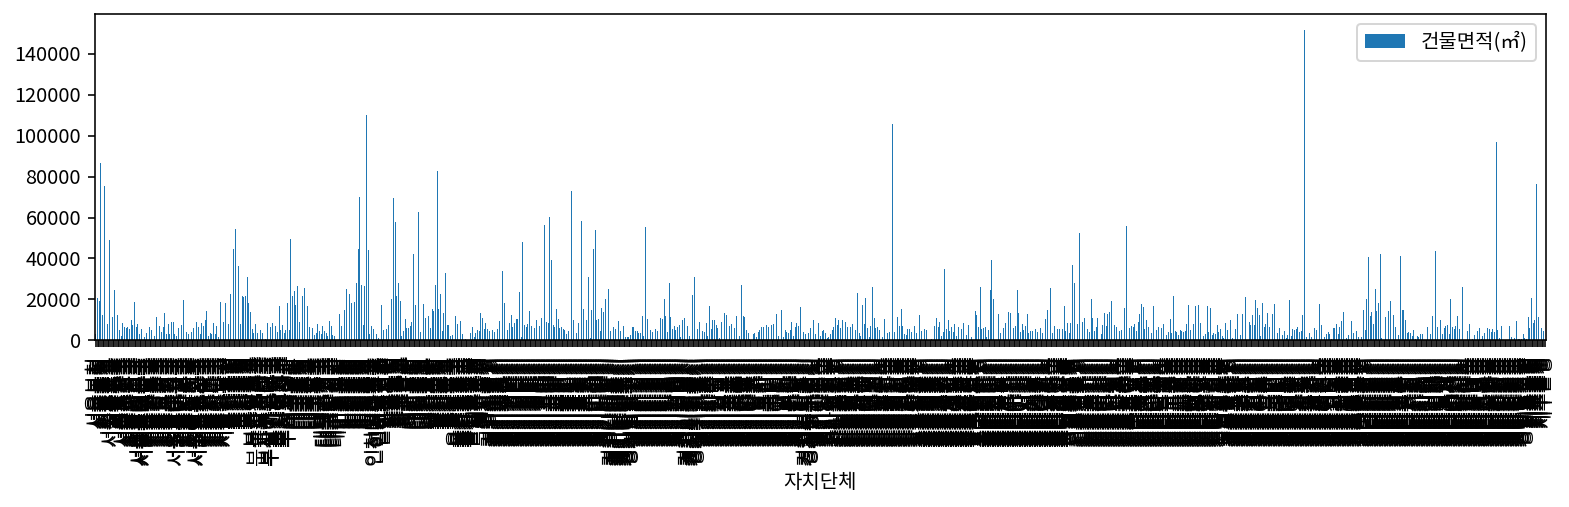

In [163]:
df[['자치단체','건물면적(㎡)']].set_index('자치단체').plot.bar(figsize=(13,3))

In [102]:
df[['자치단체','건물면적(㎡)']].set_index('자치단체')

,건물면적(㎡)
자치단체,
서울본청,"2,988"
서울본청,"20,883"
서울본청,"19,423"
서울본청,"86,574"
서울본청,"12,330"
...,...
제주본청,"11,399"
제주본청,"7,837"
제주본청,"5,822"


In [65]:
df['시설유형'].unique()

array(['문화시설', '체육시설', '기타시설', '복지시설'], dtype=object)

In [66]:
df['시설구분'].unique()

array(['박물관', '문화예술회관', '과학관', '육상경기장', '기타시설', '체육관', '청소년수련회관',
       '종합사회복지관', '공립도서관', '축구장', '기타체육시설', '미술관', '싸이클경기장', '테니스장',
       '수영장', '요트장', '빙상장', '야구장', '사격장', '양궁장', '조정카누장', '승마장',
       '롤러스케이트장', '간이운동장'], dtype=object)

In [67]:
df['시설명'].unique()

array(['서울도시건축전시관', '서울역사박물관', '한성백제박물관', '동대문디자인플라자', '서울시립과학관',
       '잠실올림픽주경기장', '광나루안전체험관', '보라매안전체험관', '서울혁신파크', '종로문화체육센터',
       '종로구민회관', '서소문역사공원 기념공간', '충무아트센터', '충무아트홀 스포츠센터', '회현체육센터',
       '중구구민회관', '용산아트홀', '용산청소년수련관', '용산구문화체육센터', '갈월종합사회복지관', '성동구립도서관',
       '성수문화복지회관', '광진정보도서관', '광진문화예술회관', '광진구민체육센터', '중곡문화체육센터',
       '답십리도서관', '동대문구체육관', '동대문종합사회복지관', '서울한방진흥센터', '용두문화복지센터',
       '중랑구립정보도서관', '중랑구민체육센터', '중랑문화체육관', '성북정보도서관',
       '성북구육아종합지원센터/부모지원센터(보문)', '강북문화예술회관', '강북구민운동장', '강북웰빙스포츠센터',
       '둘리뮤지엄', '노원정보도서관', '노원문화예술회관', '노원수학문화관', '월계문화체육센터', '은평역사한옥박물관',
       '은평문화예술회관', '은평구민체육센터', '은평다목적체육관', '서대문자연사박물관', '서대문문화체육회관',
       '마포중앙도서관', '마포구민체육센터', '마포아트센터', '양천문화회관', '허준박물관', '겸재정선미술관',
       '강서구민올림픽체육센터', '마곡레포츠센터', '금나래아트홀', '금천구민문화체육센터', '영등포제1스포츠센터',
       '영등포제2스포츠센터', '영등포구민회관', '동작구민체육센터', '사당종합체육관', '동작문화복지센터',
       '관악문화관', '관악구민종합체육센터', '서초구립반포도서관', '서초종합체육관', '심산기념문화센터',
       '도곡정보문화도서관', '역삼청소년수련관', '강남스포츠문화센터', '행복요양병원

In [68]:
df['운영방식'].unique()

array(['위탁', '직영', 'BTL'], dtype=object)